In [2]:
from npc_sessions import DynamicRoutingSession, get_sessions, utils
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import pandas as pd
import os

In [15]:
def get_performance_by_block(session):

    #loop through blocks

    task_performance_by_block={
        'context':[],
        'cross_modal_dprime':[],
        'signed_cross_modal_dprime':[],
        'vis_intra_dprime':[],
        'aud_intra_dprime':[],
    }

    for block,context in enumerate(session.sam.blockStimRewarded):

        task_performance_by_block['context'].append(context)

        if context=='vis1':
            task_performance_by_block['cross_modal_dprime'].append(session.sam.dprimeOtherModalGo[block])
            task_performance_by_block['signed_cross_modal_dprime'].append(session.sam.dprimeOtherModalGo[block])
            task_performance_by_block['vis_intra_dprime'].append(session.sam.dprimeSameModal[block])
            task_performance_by_block['aud_intra_dprime'].append(session.sam.dprimeNonrewardedModal[block])

        elif context=='sound1':
            task_performance_by_block['cross_modal_dprime'].append(session.sam.dprimeOtherModalGo[block])
            task_performance_by_block['signed_cross_modal_dprime'].append(-session.sam.dprimeOtherModalGo[block])
            task_performance_by_block['aud_intra_dprime'].append(session.sam.dprimeSameModal[block])
            task_performance_by_block['vis_intra_dprime'].append(session.sam.dprimeNonrewardedModal[block])

            
    return pd.DataFrame.from_dict(task_performance_by_block)

def plot_performance_by_block(session, task_performance_by_block_df):

    trials=session.trials.to_dataframe()

    n_passing_blocks=np.sum(task_performance_by_block_df['cross_modal_dprime']>=1.5)
    failed_block_ind=task_performance_by_block_df['cross_modal_dprime']<1.5

    #blockwise behavioral performance
    xvect=task_performance_by_block_df.index.values
    fig,ax=plt.subplots(2,1)
    ax[0].plot(xvect,task_performance_by_block_df['signed_cross_modal_dprime'],'ko-',label='cross-modal')
    ax[0].plot(xvect[failed_block_ind],task_performance_by_block_df['signed_cross_modal_dprime'][failed_block_ind],'ro',label='failed')
    ax[0].axhline(0,color='k',linestyle='--',linewidth=0.5)
    ax[0].set_title('cross-modal dprime: '+str(n_passing_blocks)+'/'+str(len(task_performance_by_block_df))+' blocks passed')
    ax[0].set_ylabel('aud <- dprime -> vis')

    ax[1].plot(xvect,task_performance_by_block_df['vis_intra_dprime'],'go-',label='vis')
    ax[1].plot(xvect,task_performance_by_block_df['aud_intra_dprime'],'bo-',label='aud')
    ax[1].set_title('intra-modal dprime')
    ax[1].legend(['vis','aud'])
    ax[1].set_xlabel('block index')
    ax[1].set_ylabel('dprime')

    fig.suptitle(session.id)
    fig.tight_layout()

    return fig

def plot_first_lick_latency_hist(session):
    #first lick latency histogram

    trials=session.trials.to_dataframe()

    xbins=np.arange(0,1,0.05)
    fig,ax=plt.subplots(1,1)
    ax.hist(trials.query('is_vis_stim==True')['response_time']-
            trials.query('is_vis_stim==True')['stim_start_time'],
            bins=xbins,alpha=0.5)

    ax.hist(trials.query('is_aud_stim==True')['response_time']-
            trials.query('is_aud_stim==True')['stim_start_time'],
            bins=xbins,alpha=0.5)

    ax.legend(['vis stim','aud stim'])
    ax.set_xlabel('lick latency (s)')
    ax.set_ylabel('trial count')
    ax.set_title('lick latency: '+session.id)

    return fig

def plot_lick_raster(session):

    lick_times=utils.get_sync_data(session.sync_data).get_rising_edges(
            "lick_sensor", units="seconds"
        )
    trials=session.trials.to_dataframe()

    fig,ax=plt.subplots(1,1)
    ax.axvline(0,color='k',linestyle='--',linewidth=0.5)
    for tt,trial in trials.iterrows():

        trial_licks = lick_times[
            (lick_times>trial['stim_start_time']-1) & 
            (lick_times<trial['stim_start_time']+2)
            ]-trial['stim_start_time']
        
        ax.vlines(trial_licks,tt,tt+1)

    ax.set_xlim([-1,2])
    ax.set_xlabel('time rel to stim onset (s)')
    ax.set_ylabel('trial number')
    ax.set_title('lick raster: '+session.id)

    return fig


In [4]:
session = DynamicRoutingSession('668755_2023-08-31')

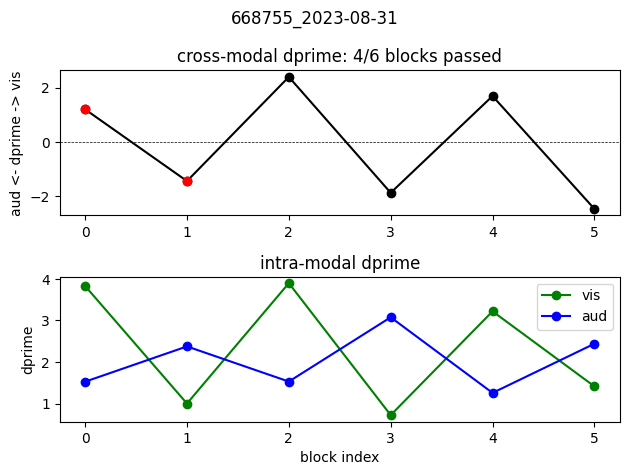

In [16]:
task_performance_by_block_df = get_performance_by_block(session)
fig=plot_performance_by_block(session, task_performance_by_block_df)


In [ ]:
fig=plot_first_lick_latency_hist(session)

In [ ]:
fig=plot_lick_raster(session)

c:\Users\ethan.mcbride\Code\npc_sessions\.venv\Lib\site-packages\numcodecs\abc.py:107: UserWarning: Multi-threading is supported for wavpack version>=5.6.4, but current version is 5.5.0. Parallel decoding will not be available.
  return cls(**config)
c:\Users\ethan.mcbride\Code\npc_sessions\.venv\Lib\site-packages\numcodecs\abc.py:107: UserWarning: Multi-threading is supported for wavpack version>=5.6.4, but current version is 5.5.0. Parallel decoding will not be available.
  return cls(**config)
c:\Users\ethan.mcbride\Code\npc_sessions\.venv\Lib\site-packages\numcodecs\abc.py:107: UserWarning: Multi-threading is supported for wavpack version>=5.6.4, but current version is 5.5.0. Parallel decoding will not be available.
  return cls(**config)
c:\Users\ethan.mcbride\Code\npc_sessions\.venv\Lib\site-packages\numcodecs\abc.py:107: UserWarning: Multi-threading is supported for wavpack version>=5.6.4, but current version is 5.5.0. Parallel decoding will not be available.
  return cls(**conf

trialSoundArray empty; regenerating sound arrays
trialSoundArray empty; regenerating sound arrays
trialSoundArray empty; regenerating sound arrays


c:\Users\ethan.mcbride\Code\npc_sessions\.venv\Lib\site-packages\DynamicRoutingTask\Analysis\DynamicRoutingAnalysisUtils.py:215: RuntimeWarning: invalid value encountered in scalar divide
  self.falseAlarmOtherModalGo.append(self.falseAlarmTrials[otherModalGo].sum() / otherModalGo.sum())
c:\Users\ethan.mcbride\Code\npc_sessions\.venv\Lib\site-packages\numcodecs\abc.py:107: UserWarning: Multi-threading is supported for wavpack version>=5.6.4, but current version is 5.5.0. Parallel decoding will not be available.
  return cls(**config)


trialSoundArray empty; regenerating sound arrays


c:\Users\ethan.mcbride\Code\npc_sessions\.venv\Lib\site-packages\DynamicRoutingTask\Analysis\DynamicRoutingAnalysisUtils.py:215: RuntimeWarning: invalid value encountered in scalar divide
  self.falseAlarmOtherModalGo.append(self.falseAlarmTrials[otherModalGo].sum() / otherModalGo.sum())
c:\Users\ethan.mcbride\Code\npc_sessions\.venv\Lib\site-packages\numcodecs\abc.py:107: UserWarning: Multi-threading is supported for wavpack version>=5.6.4, but current version is 5.5.0. Parallel decoding will not be available.
  return cls(**config)


trialSoundArray empty; regenerating sound arrays
trialSoundArray empty; regenerating sound arrays


c:\Users\ethan.mcbride\Code\npc_sessions\.venv\Lib\site-packages\DynamicRoutingTask\Analysis\DynamicRoutingAnalysisUtils.py:215: RuntimeWarning: invalid value encountered in scalar divide
  self.falseAlarmOtherModalGo.append(self.falseAlarmTrials[otherModalGo].sum() / otherModalGo.sum())
c:\Users\ethan.mcbride\Code\npc_sessions\.venv\Lib\site-packages\numcodecs\abc.py:107: UserWarning: Multi-threading is supported for wavpack version>=5.6.4, but current version is 5.5.0. Parallel decoding will not be available.
  return cls(**config)


trialSoundArray empty; regenerating sound arrays


c:\Users\ethan.mcbride\Code\npc_sessions\.venv\Lib\site-packages\DynamicRoutingTask\Analysis\DynamicRoutingAnalysisUtils.py:215: RuntimeWarning: invalid value encountered in scalar divide
  self.falseAlarmOtherModalGo.append(self.falseAlarmTrials[otherModalGo].sum() / otherModalGo.sum())
c:\Users\ethan.mcbride\Code\npc_sessions\.venv\Lib\site-packages\numcodecs\abc.py:107: UserWarning: Multi-threading is supported for wavpack version>=5.6.4, but current version is 5.5.0. Parallel decoding will not be available.
  return cls(**config)


trialSoundArray empty; regenerating sound arrays


c:\Users\ethan.mcbride\Code\npc_sessions\.venv\Lib\site-packages\DynamicRoutingTask\Analysis\DynamicRoutingAnalysisUtils.py:215: RuntimeWarning: invalid value encountered in scalar divide
  self.falseAlarmOtherModalGo.append(self.falseAlarmTrials[otherModalGo].sum() / otherModalGo.sum())
c:\Users\ethan.mcbride\Code\npc_sessions\.venv\Lib\site-packages\numcodecs\abc.py:107: UserWarning: Multi-threading is supported for wavpack version>=5.6.4, but current version is 5.5.0. Parallel decoding will not be available.
  return cls(**config)
c:\Users\ethan.mcbride\Code\npc_sessions\.venv\Lib\site-packages\DynamicRoutingTask\Analysis\DynamicRoutingAnalysisUtils.py:215: RuntimeWarning: invalid value encountered in scalar divide
  self.falseAlarmOtherModalGo.append(self.falseAlarmTrials[otherModalGo].sum() / otherModalGo.sum())
c:\Users\ethan.mcbride\Code\npc_sessions\.venv\Lib\site-packages\numcodecs\abc.py:107: UserWarning: Multi-threading is supported for wavpack version>=5.6.4, but current ve

trialSoundArray empty; regenerating sound arrays


c:\Users\ethan.mcbride\Code\npc_sessions\.venv\Lib\site-packages\DynamicRoutingTask\Analysis\DynamicRoutingAnalysisUtils.py:215: RuntimeWarning: invalid value encountered in scalar divide
  self.falseAlarmOtherModalGo.append(self.falseAlarmTrials[otherModalGo].sum() / otherModalGo.sum())
c:\Users\ethan.mcbride\Code\npc_sessions\.venv\Lib\site-packages\DynamicRoutingTask\Analysis\DynamicRoutingAnalysisUtils.py:215: RuntimeWarning: invalid value encountered in scalar divide
  self.falseAlarmOtherModalGo.append(self.falseAlarmTrials[otherModalGo].sum() / otherModalGo.sum())
c:\Users\ethan.mcbride\Code\npc_sessions\.venv\Lib\site-packages\numcodecs\abc.py:107: UserWarning: Multi-threading is supported for wavpack version>=5.6.4, but current version is 5.5.0. Parallel decoding will not be available.
  return cls(**config)


trialSoundArray empty; regenerating sound arrays
trialSoundArray empty; regenerating sound arrays


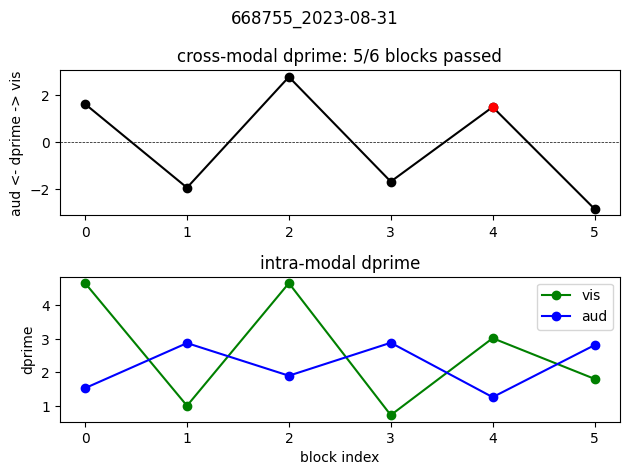

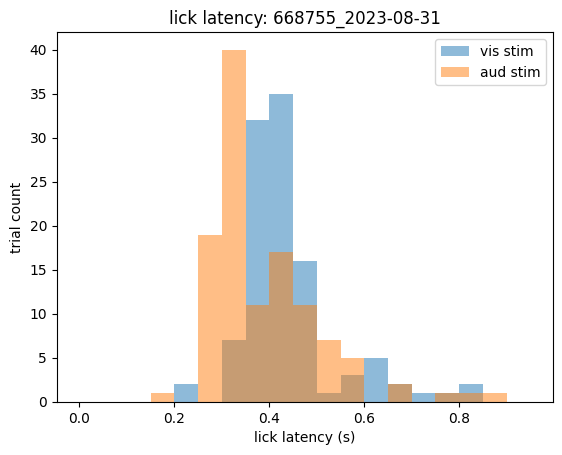

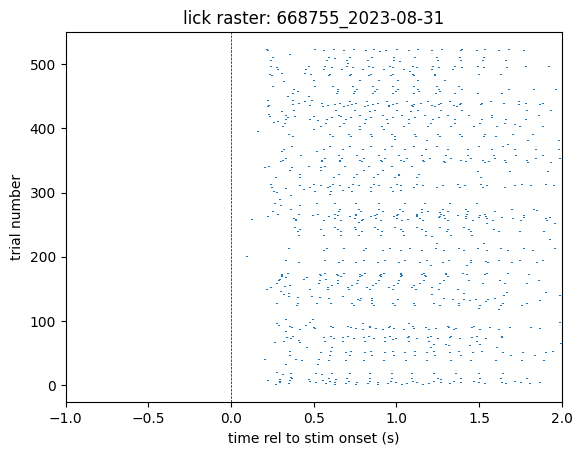

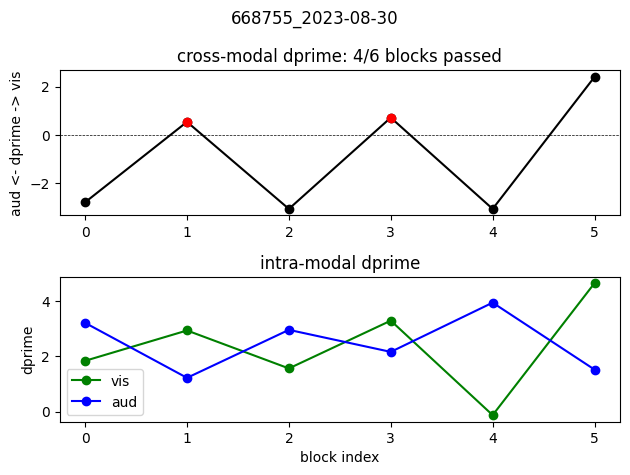

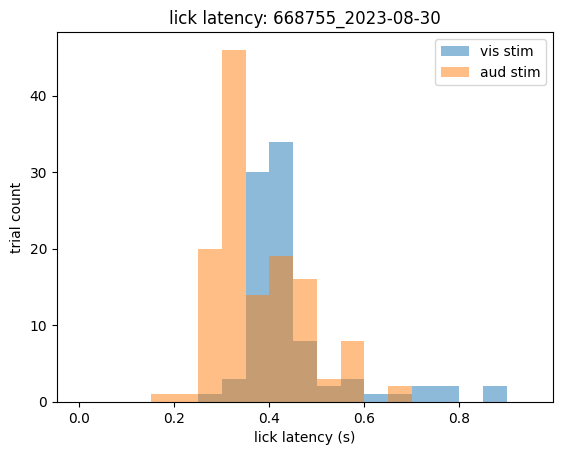

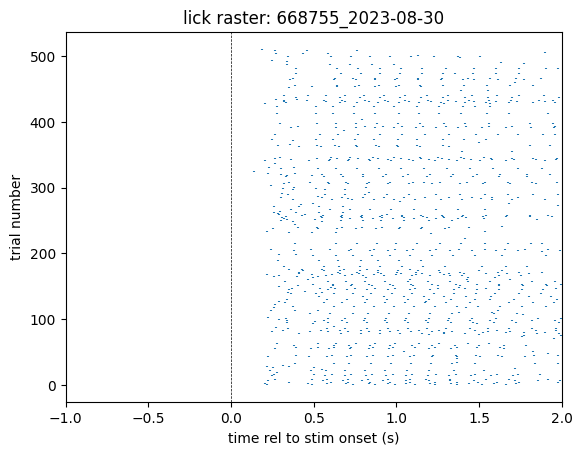

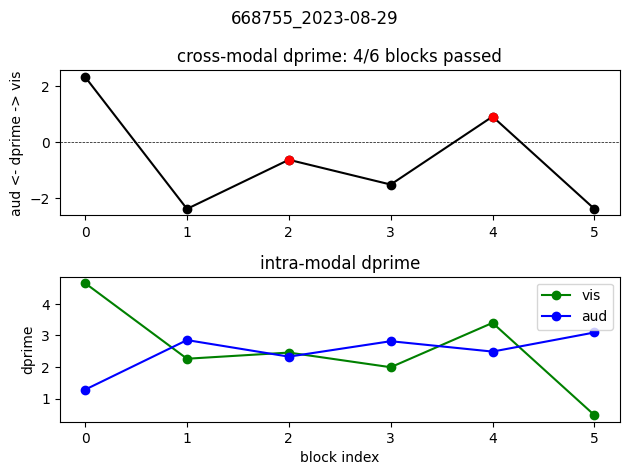

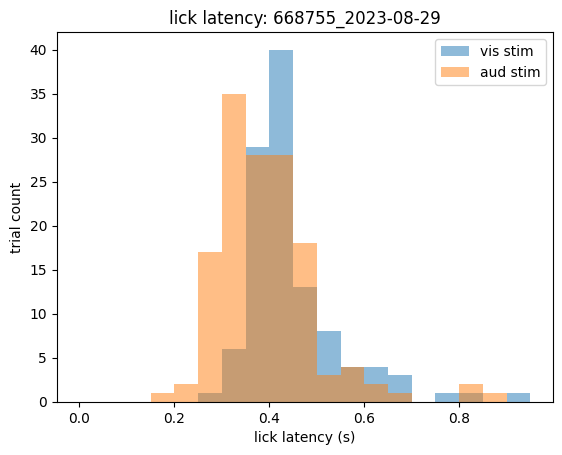

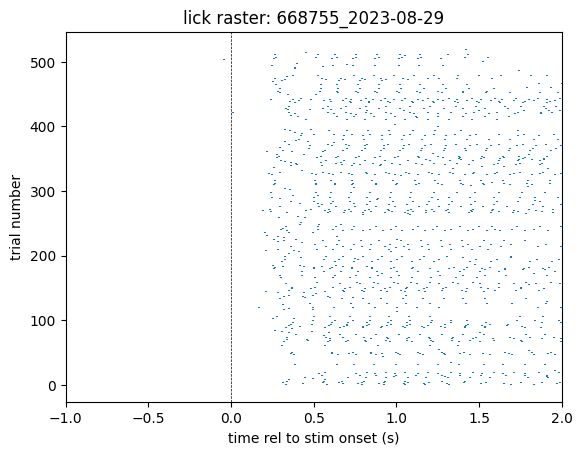

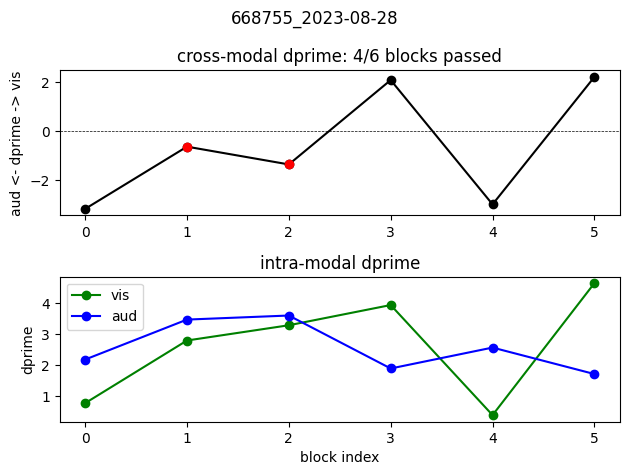

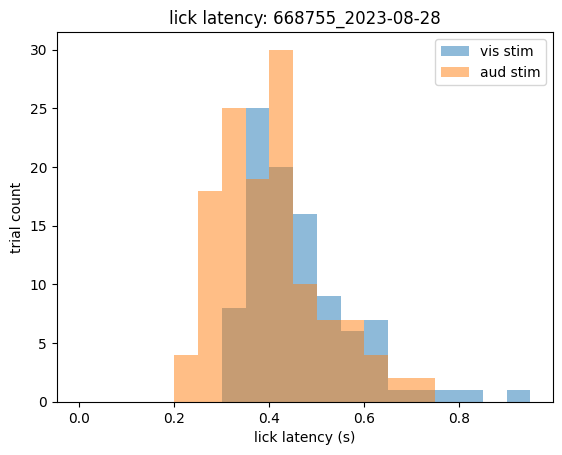

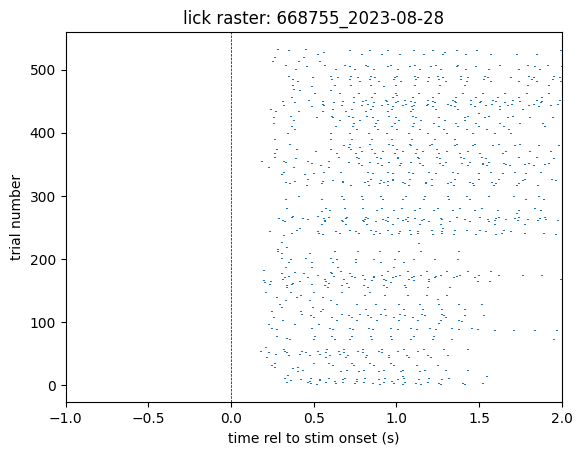

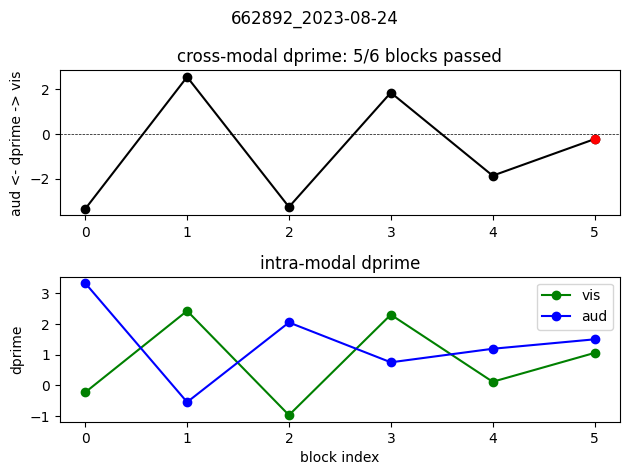

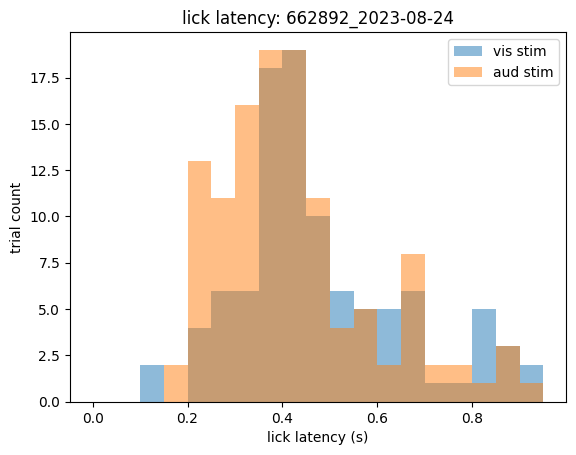

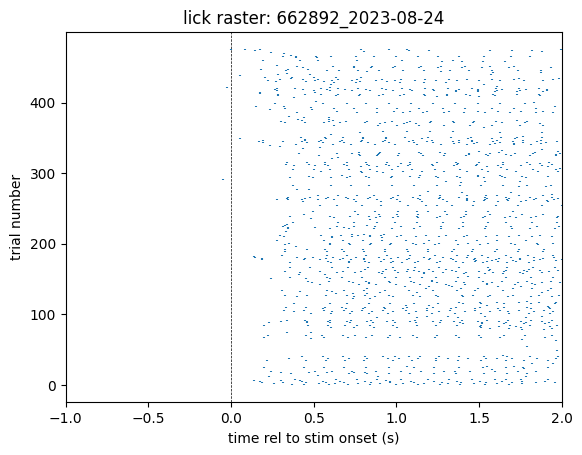

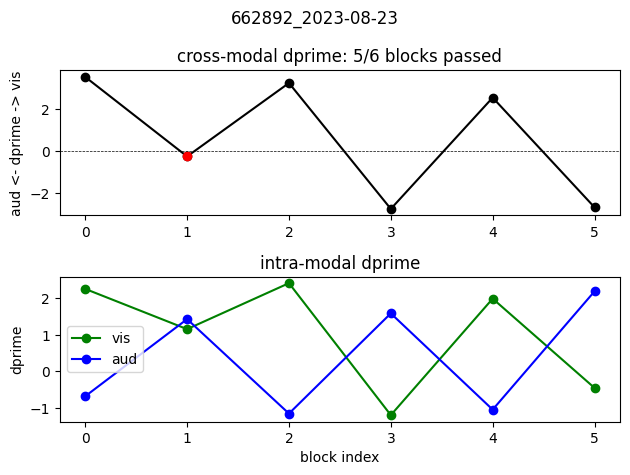

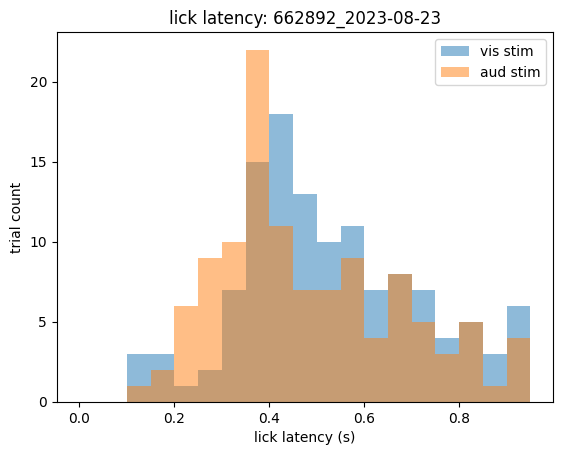

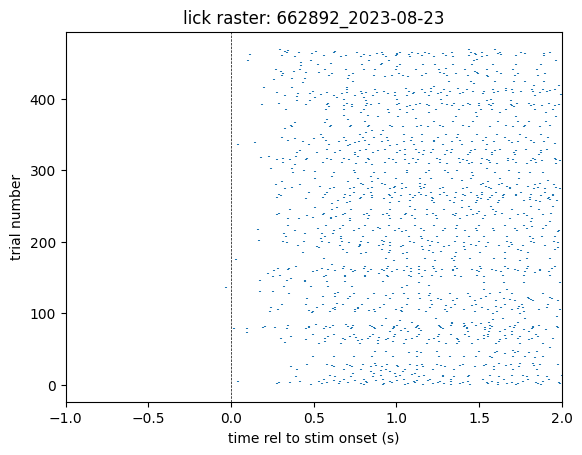

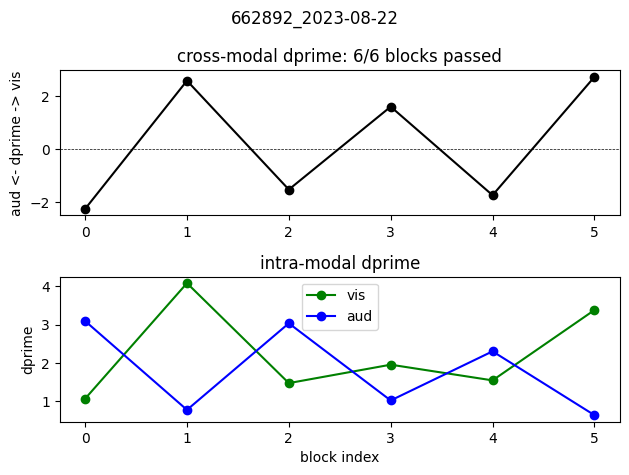

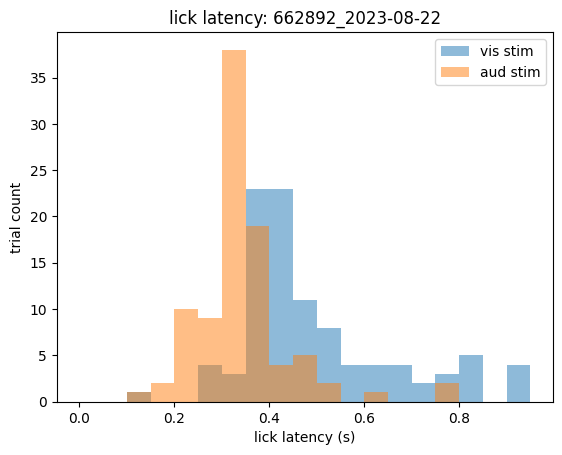

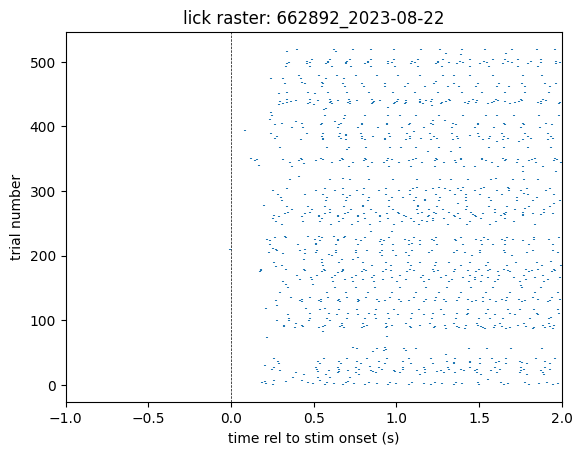

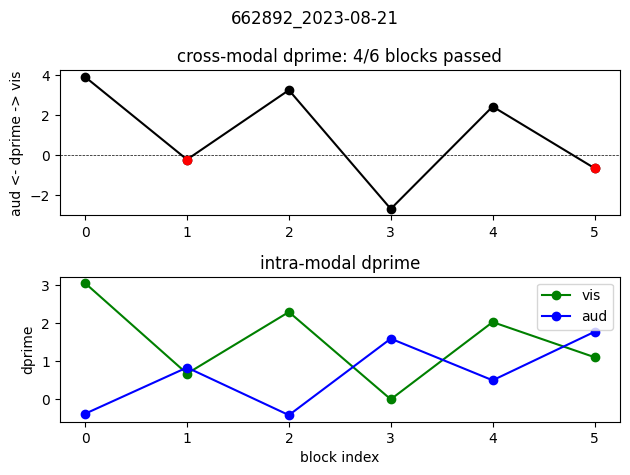

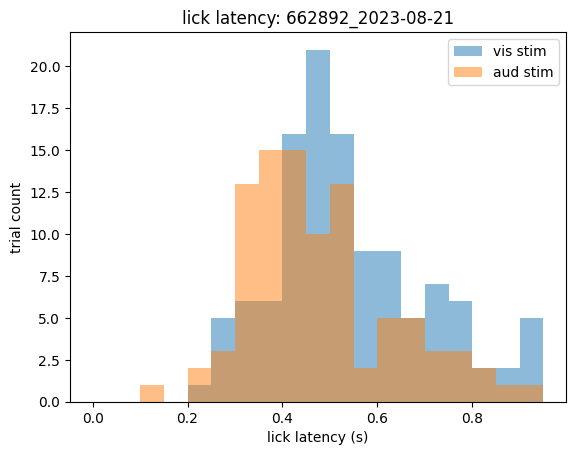

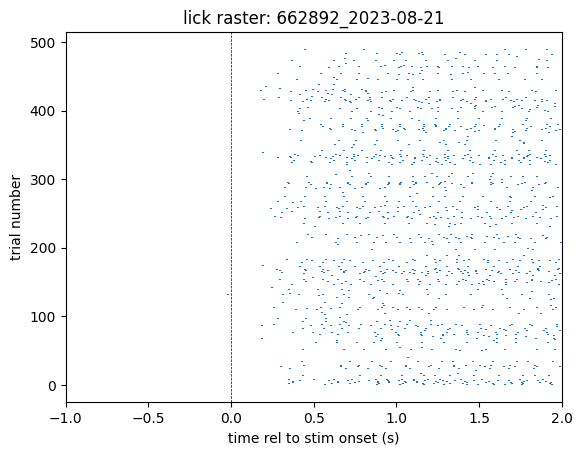

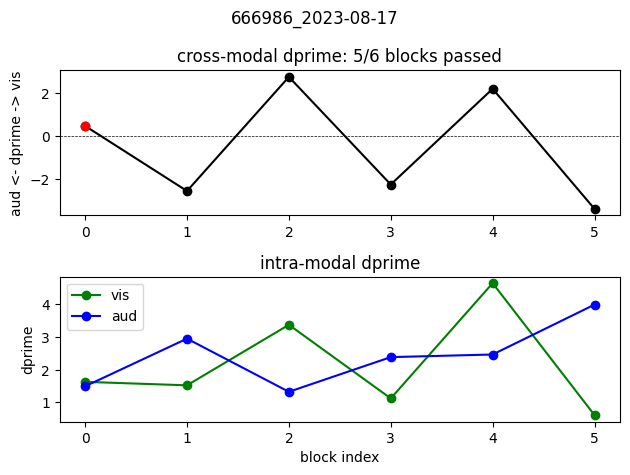

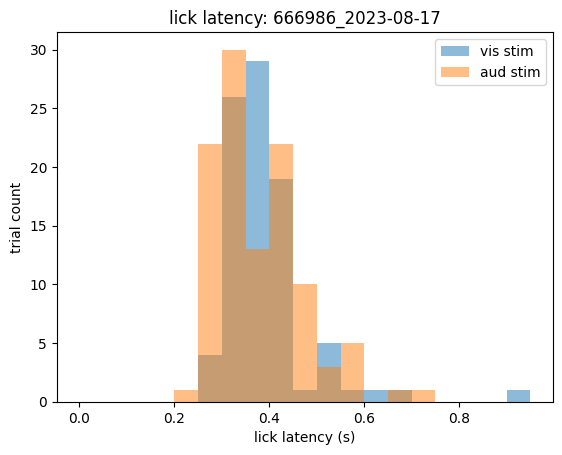

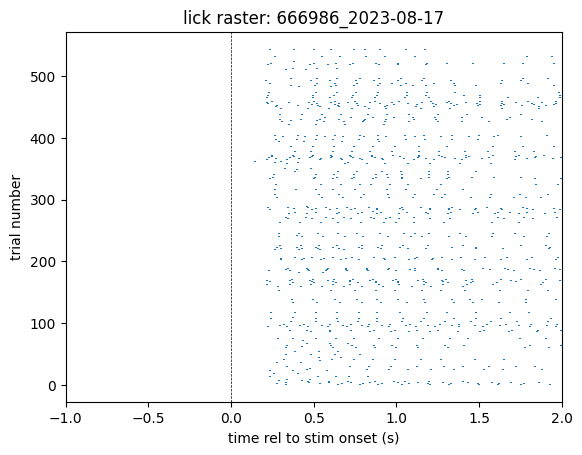

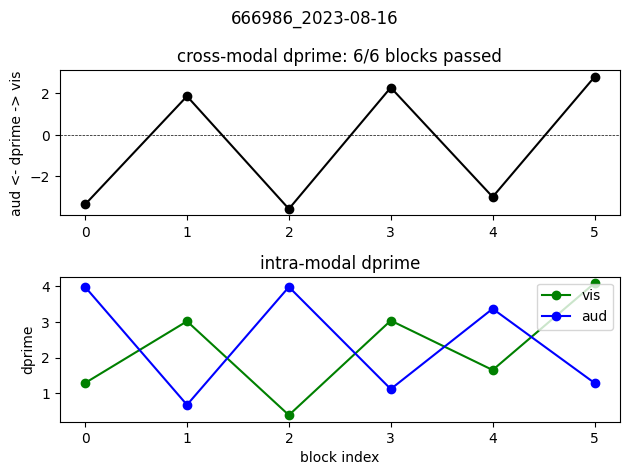

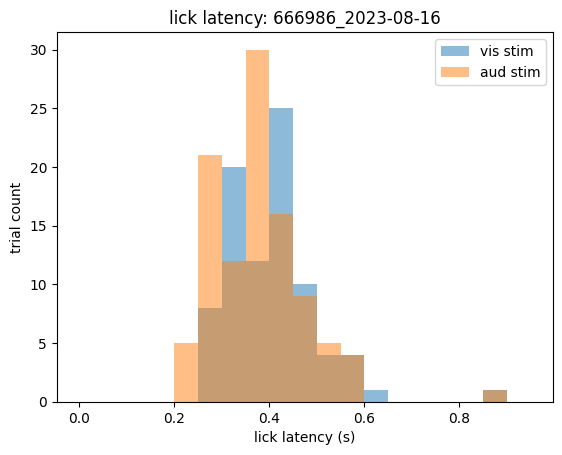

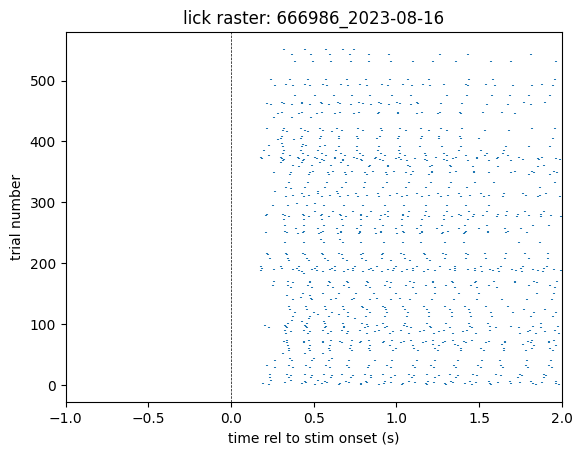

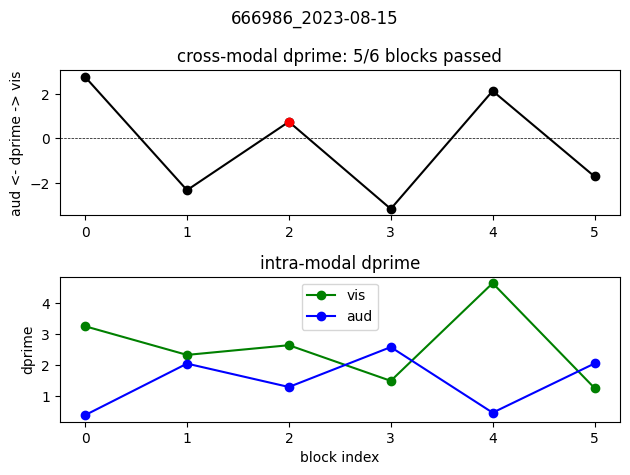

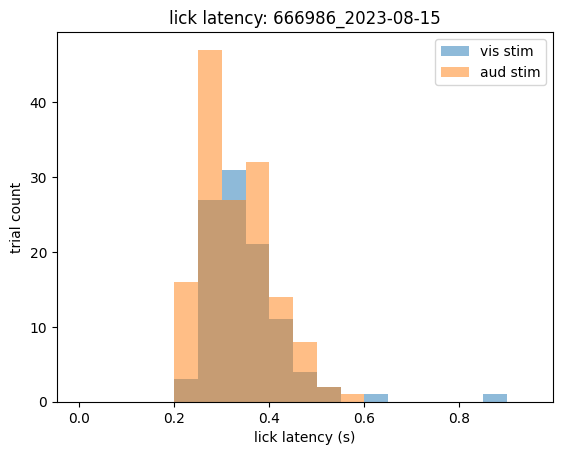

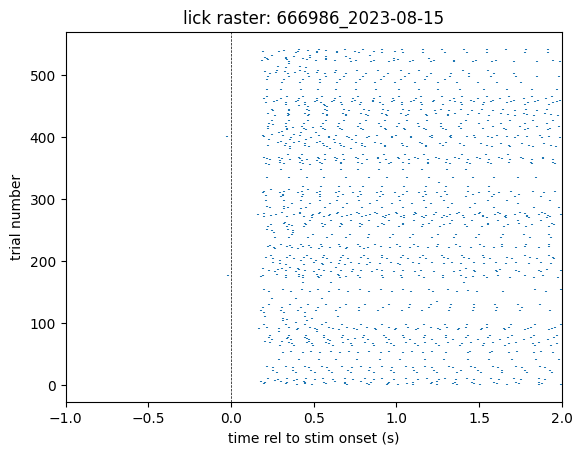

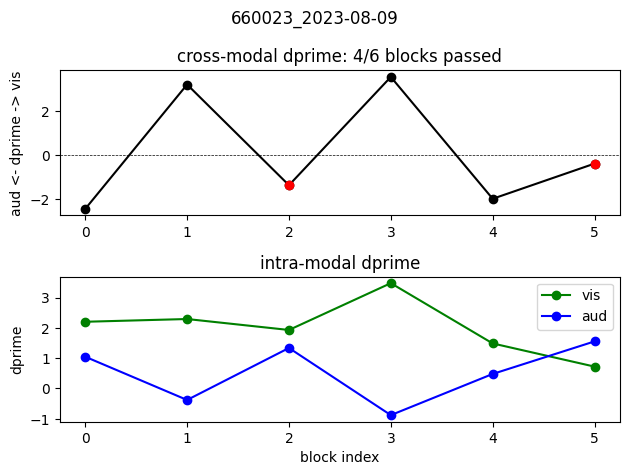

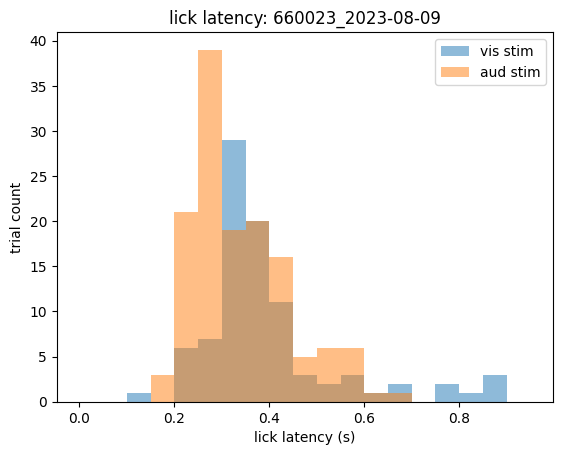

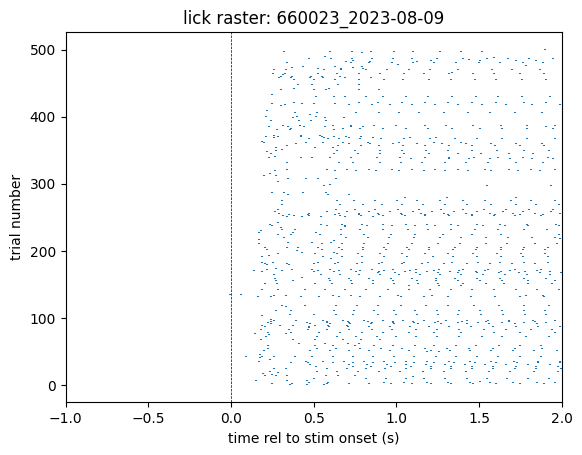

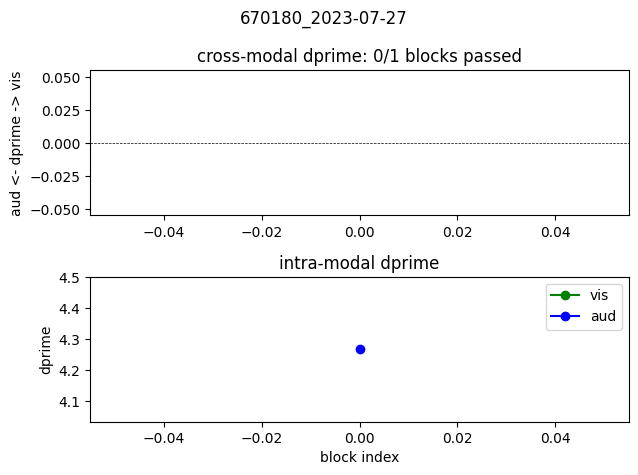

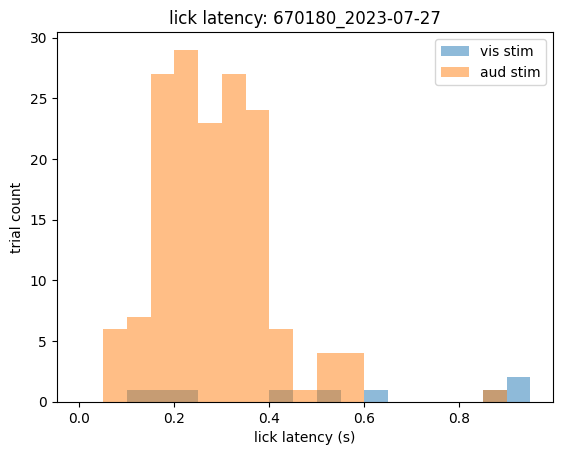

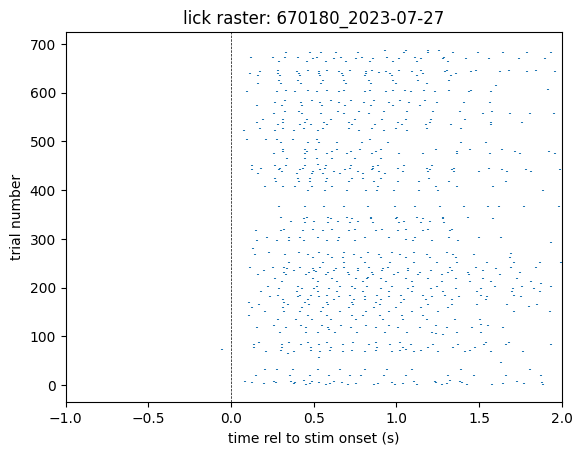

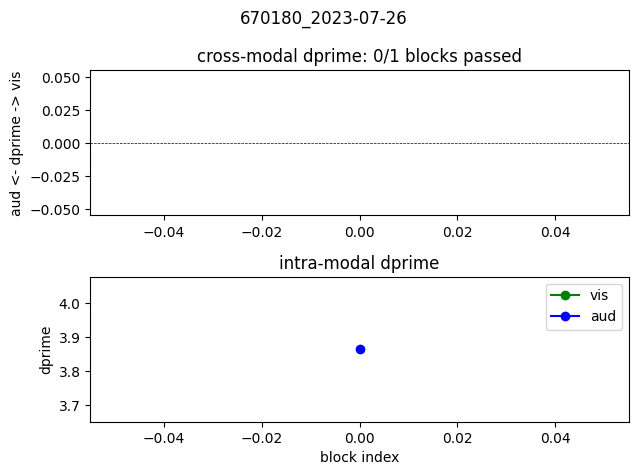

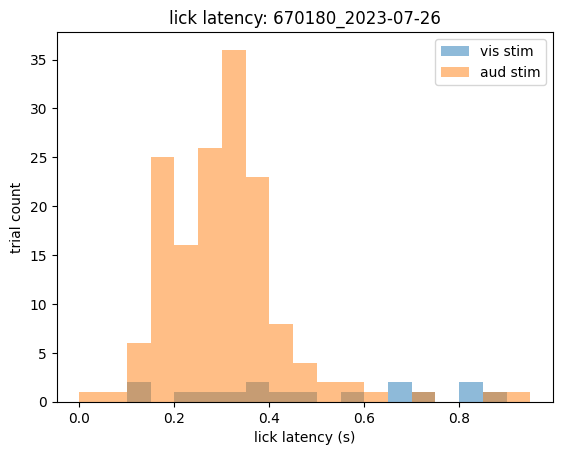

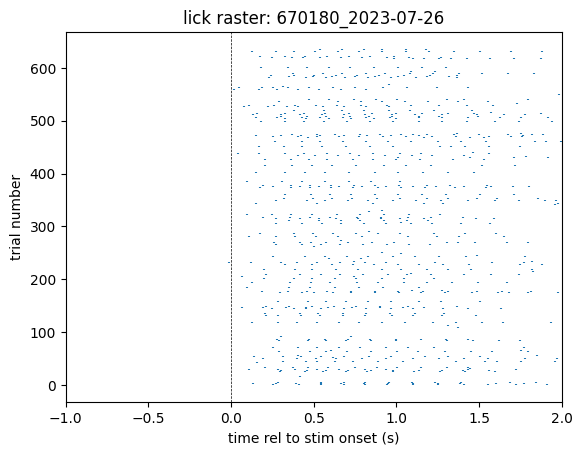

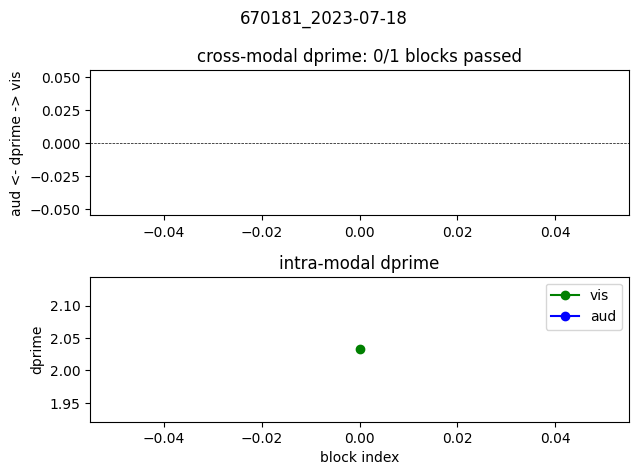

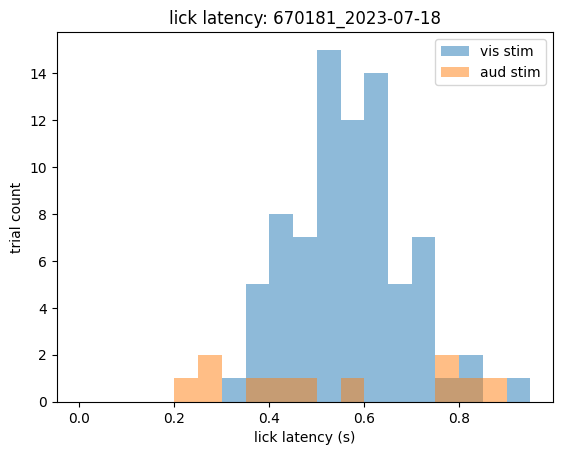

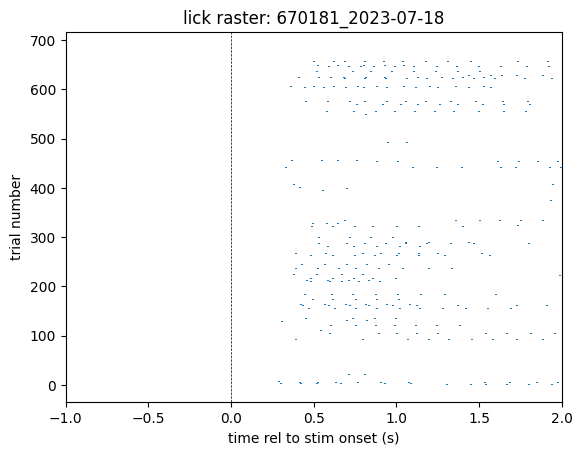

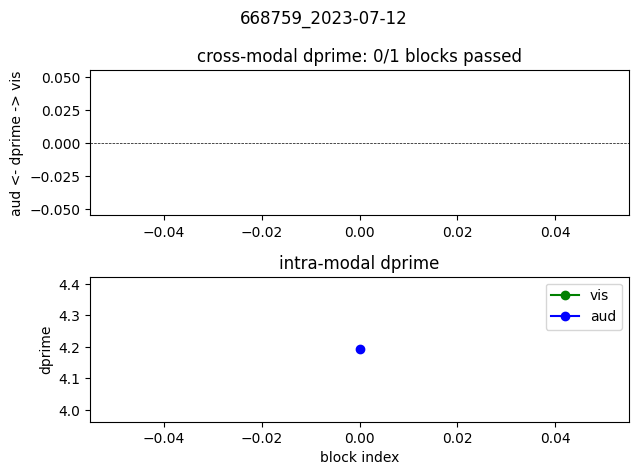

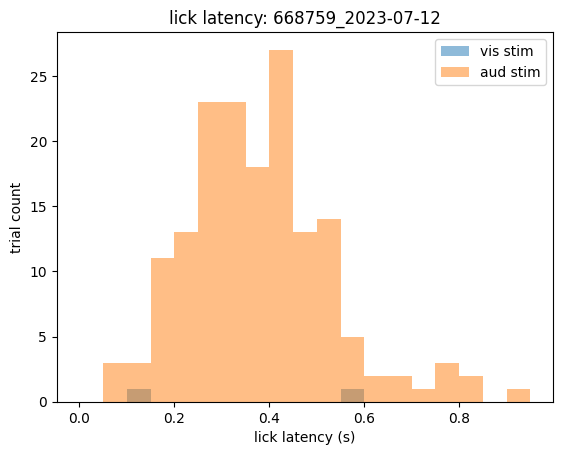

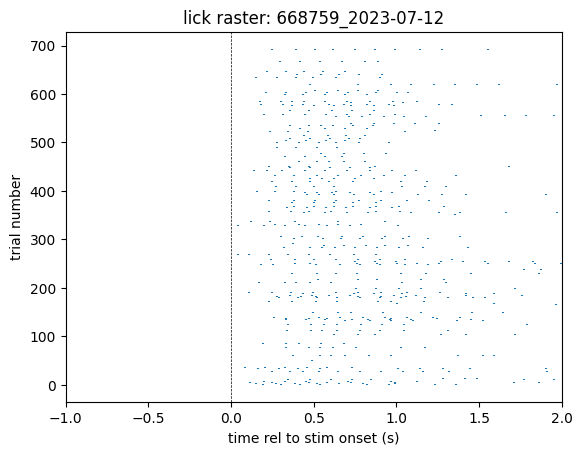

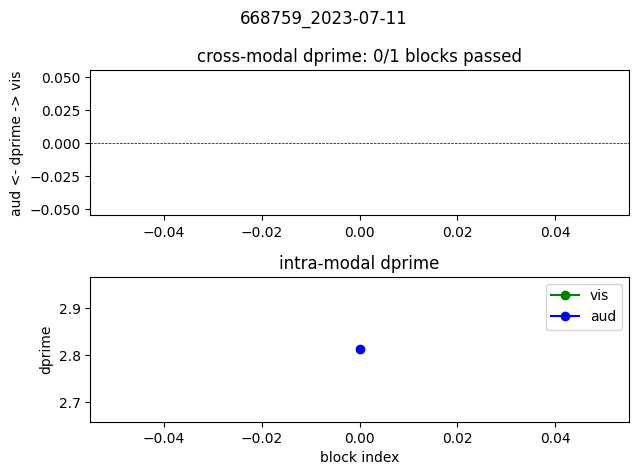

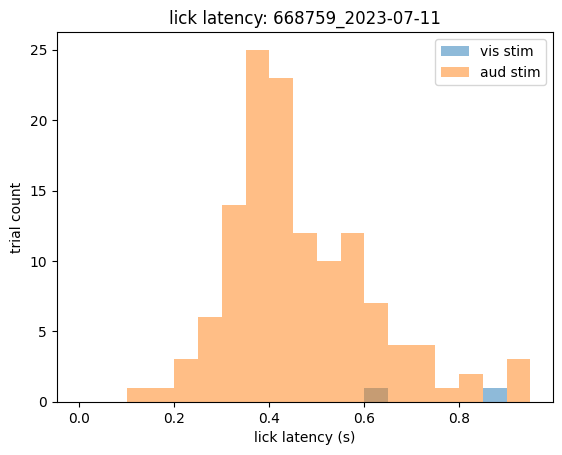

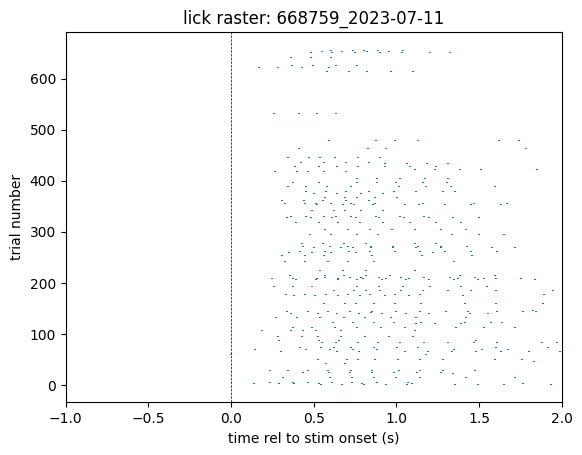

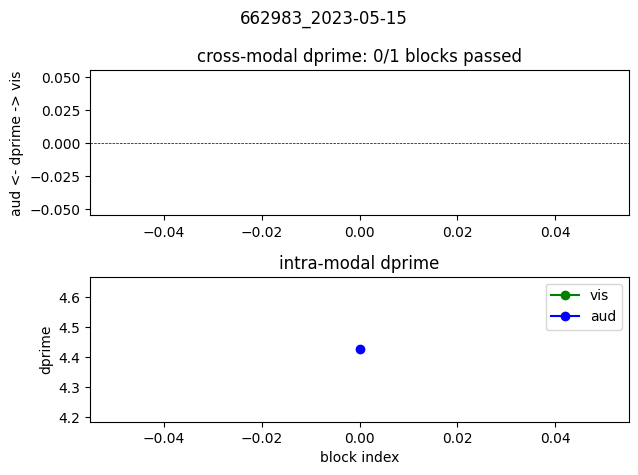

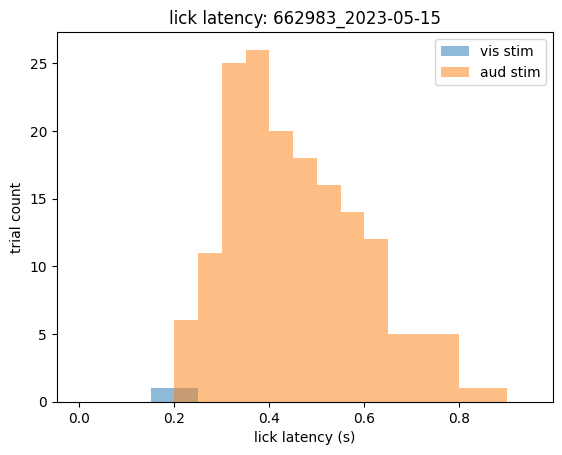

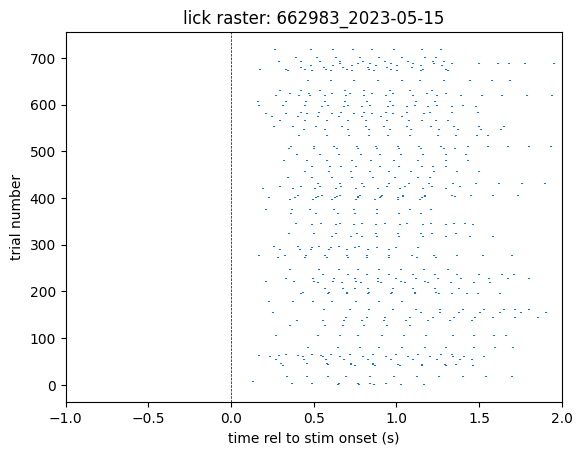

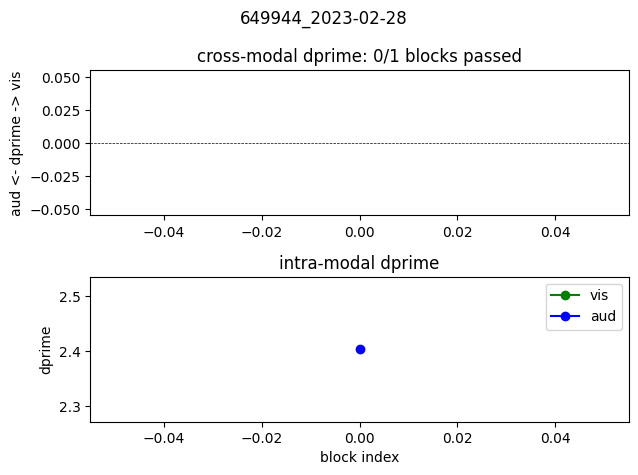

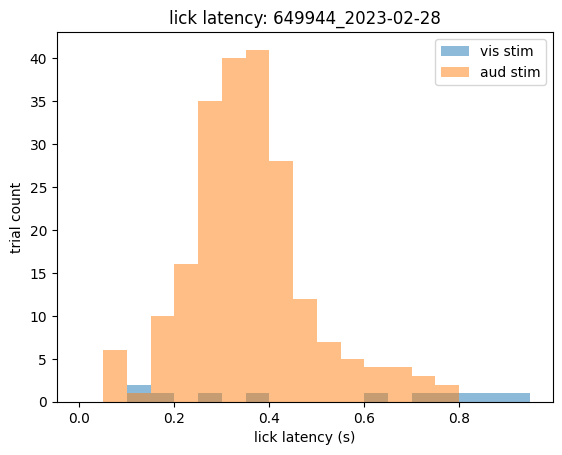

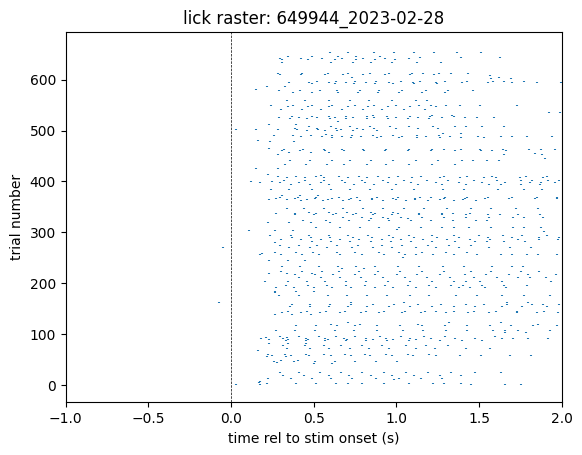

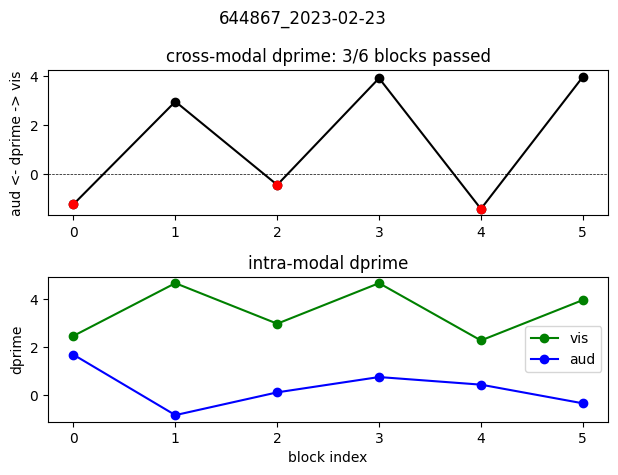

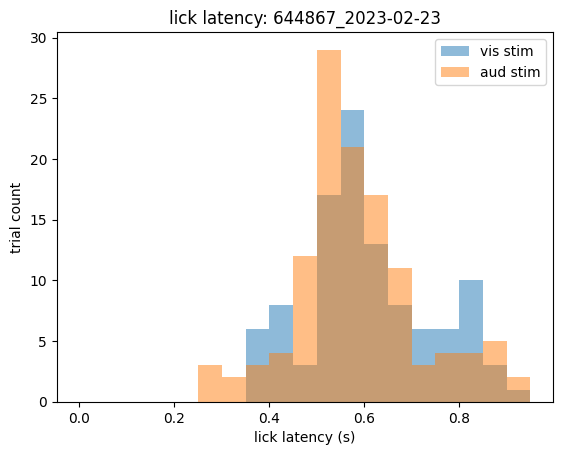

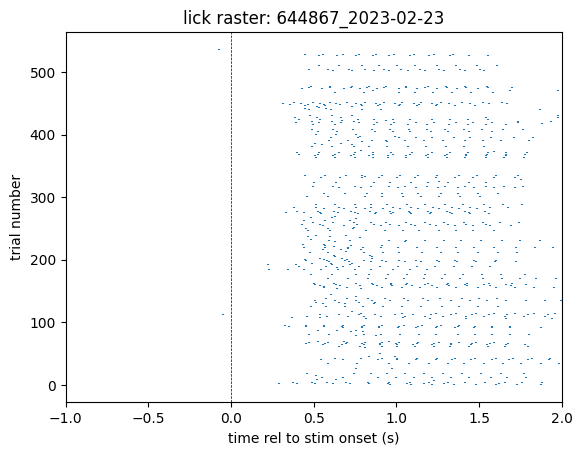

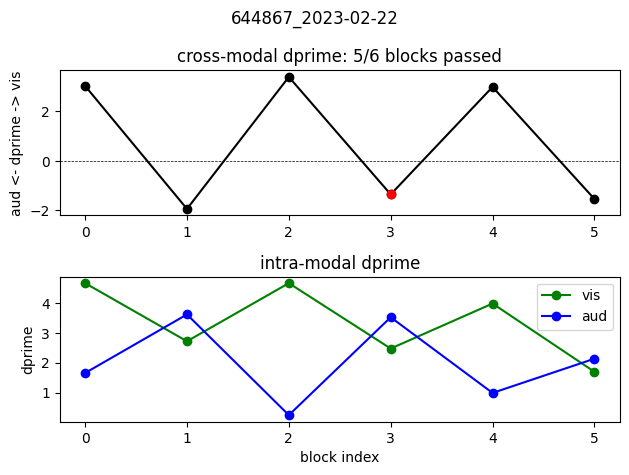

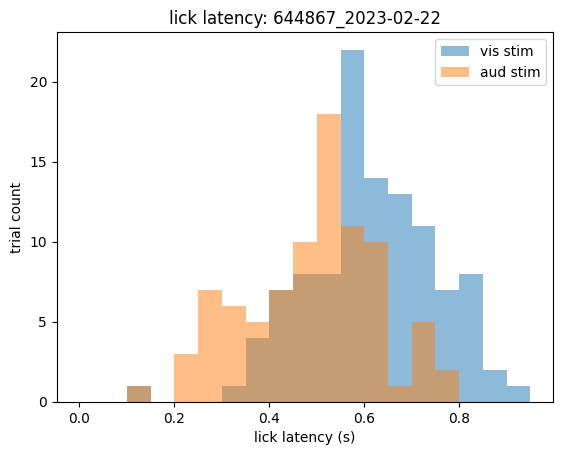

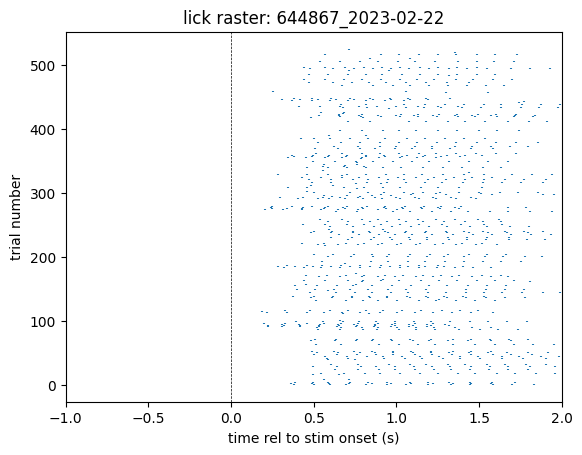

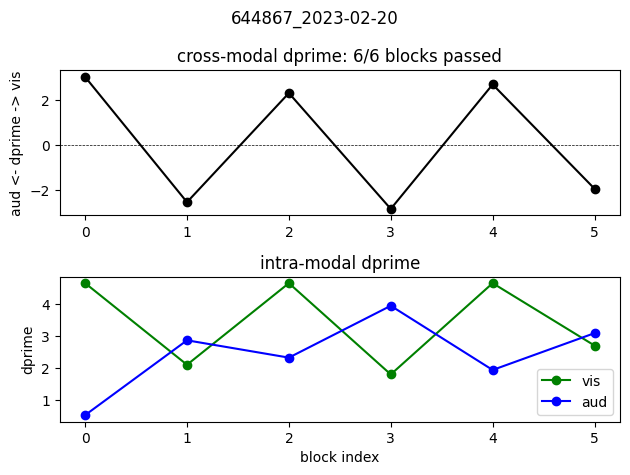

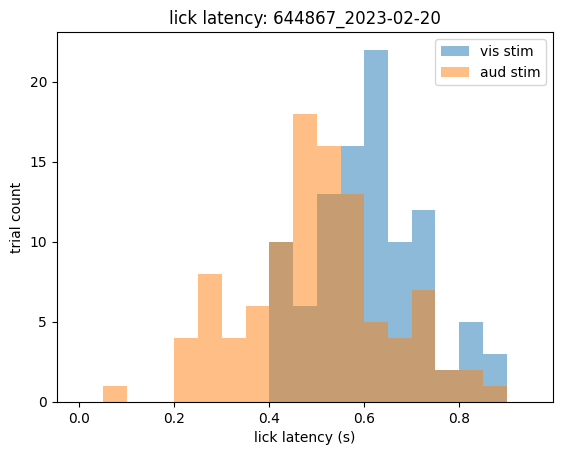

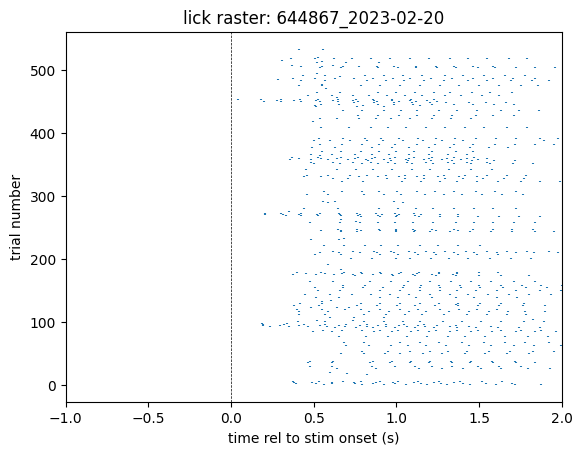

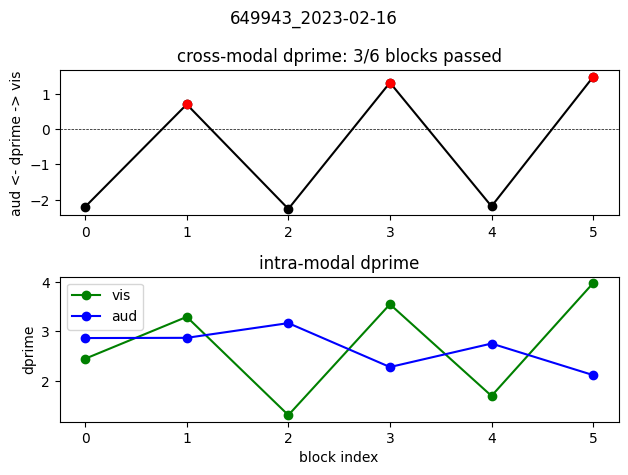

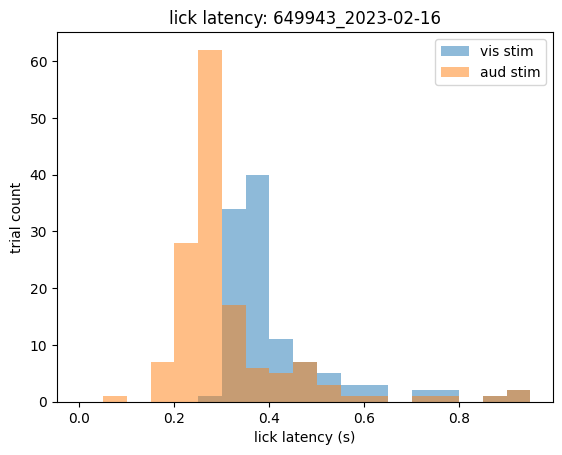

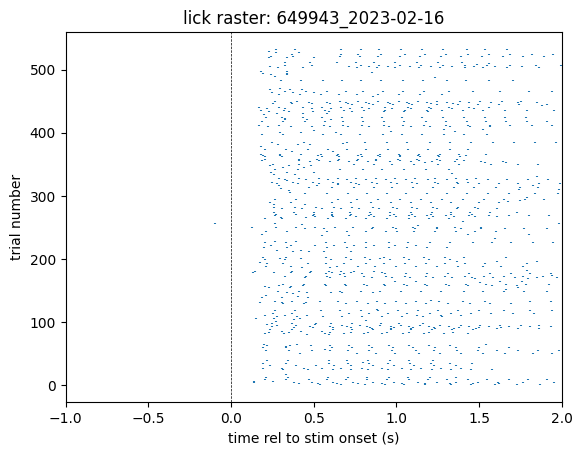

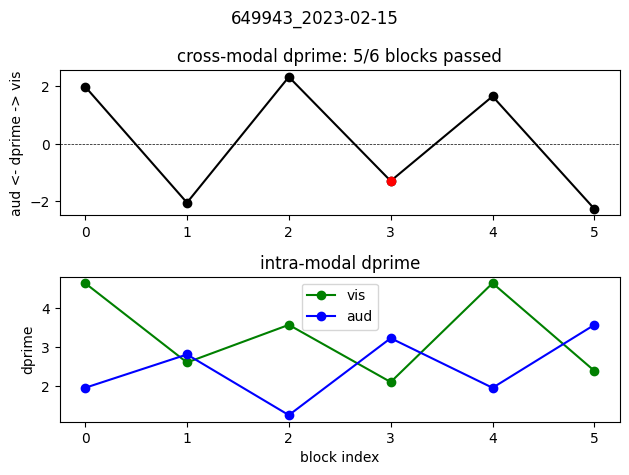

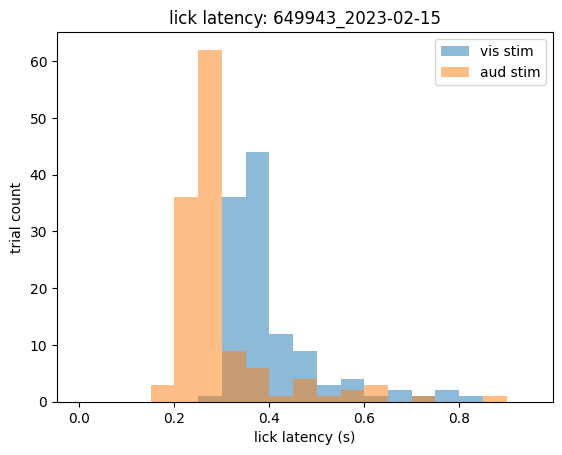

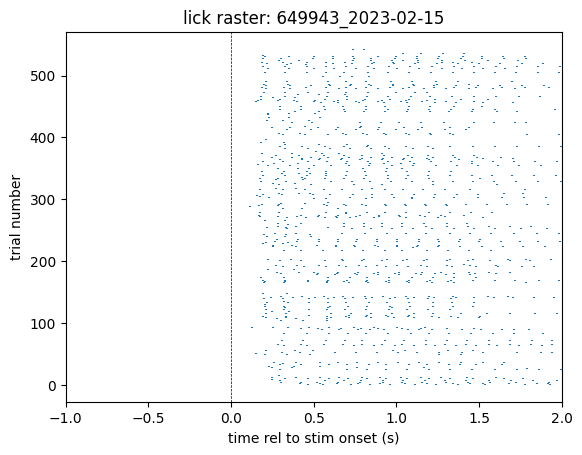

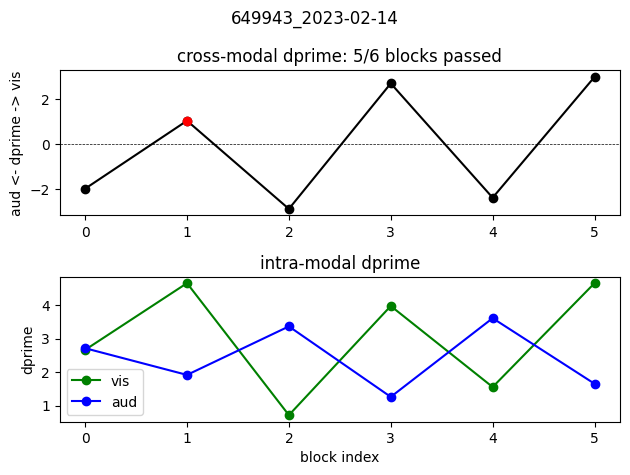

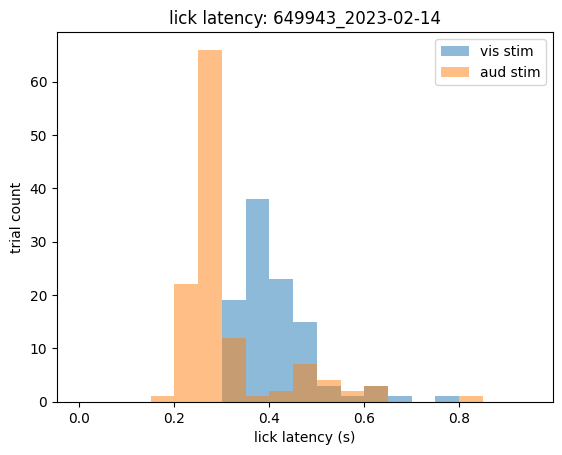

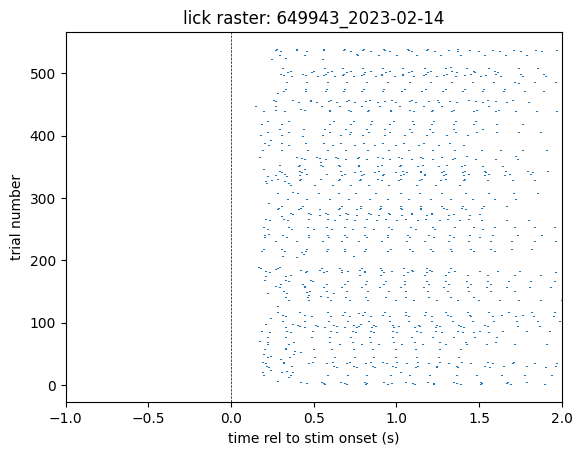

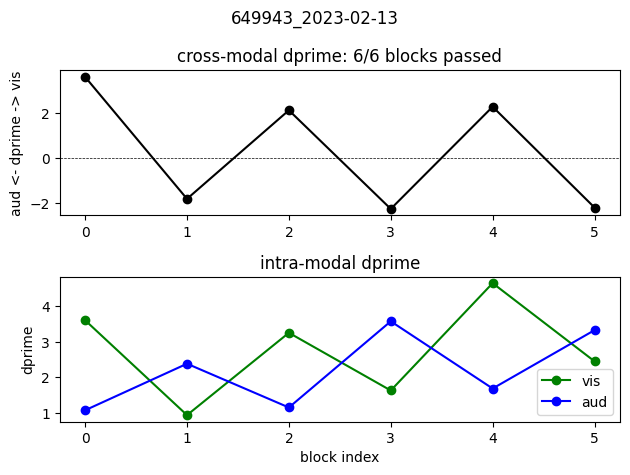

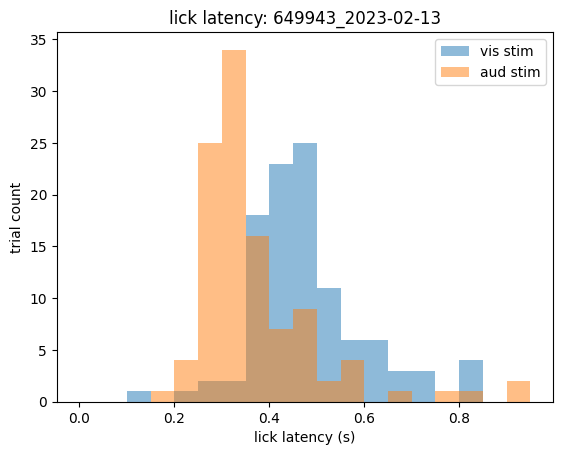

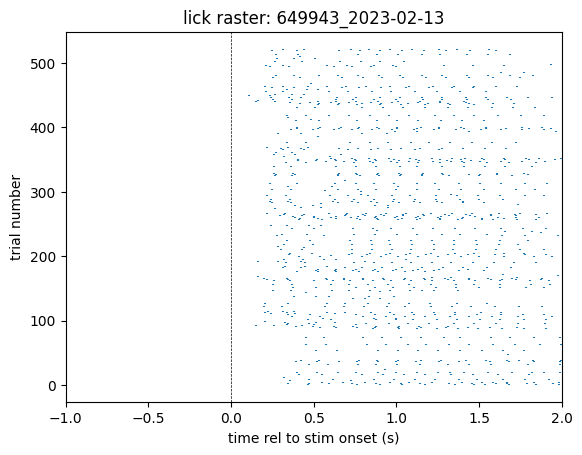

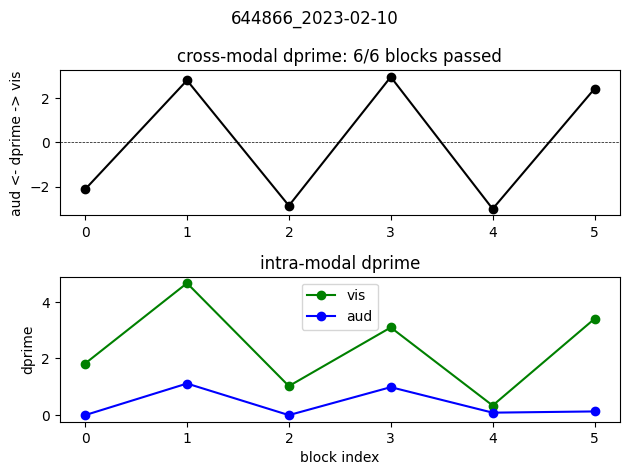

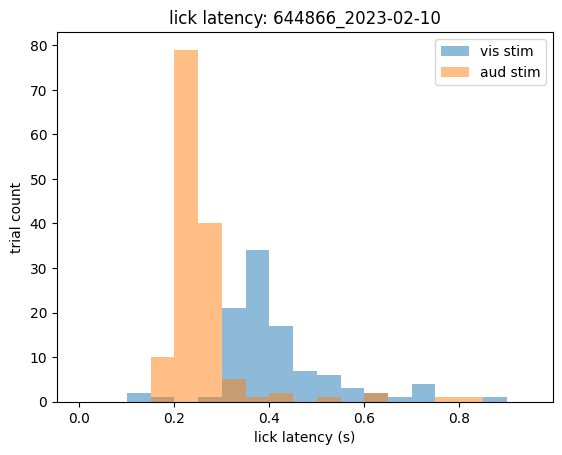

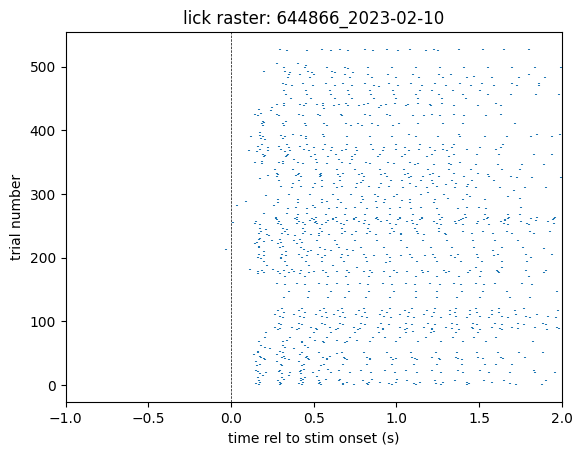

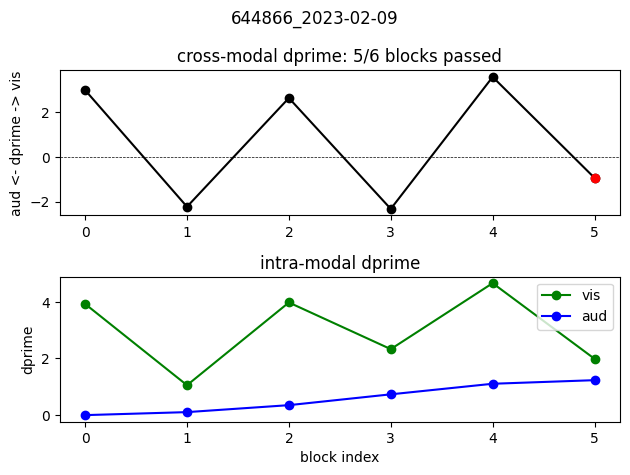

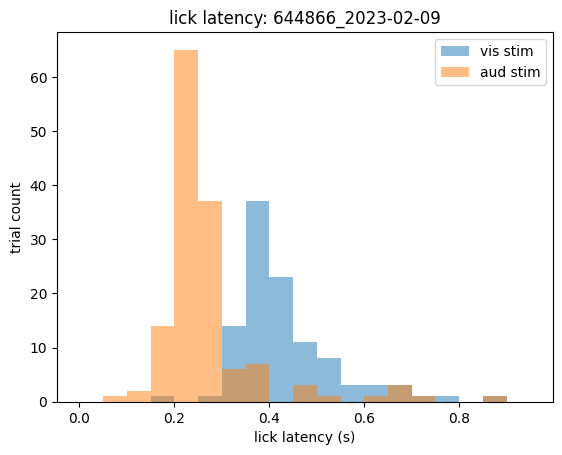

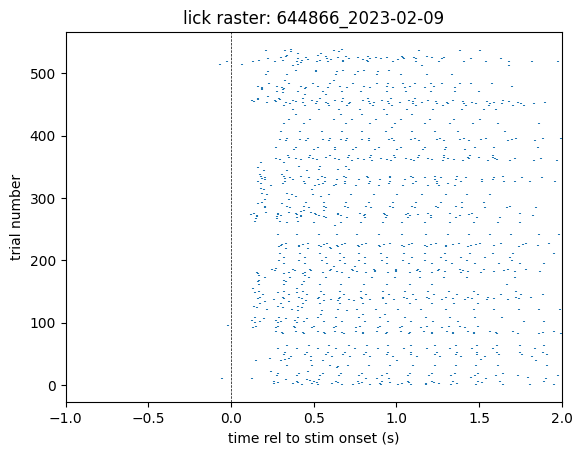

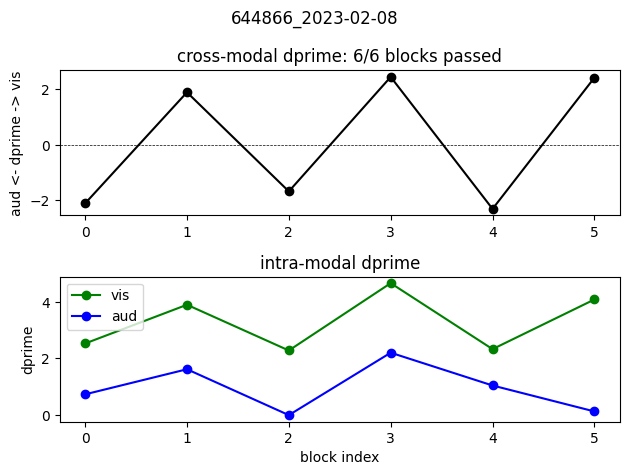

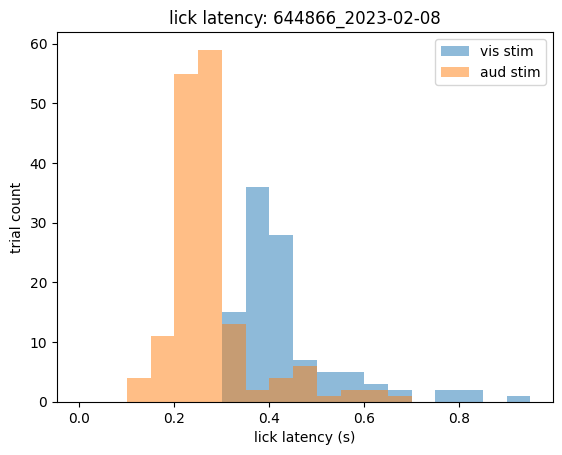

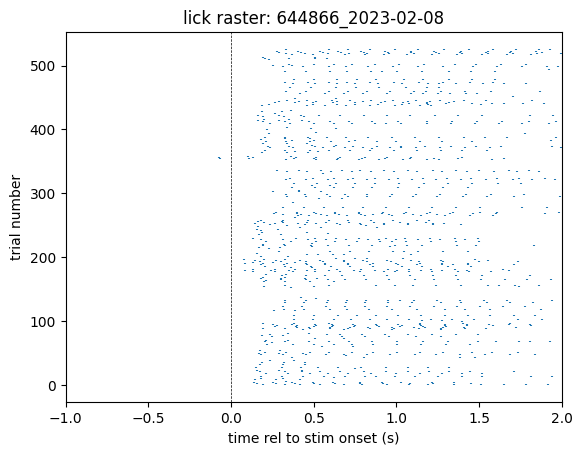

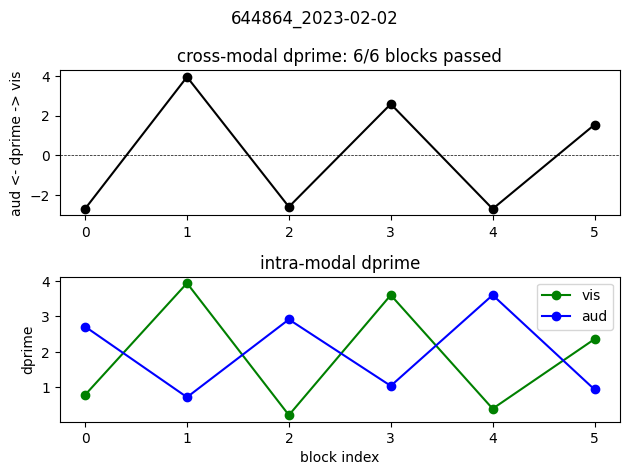

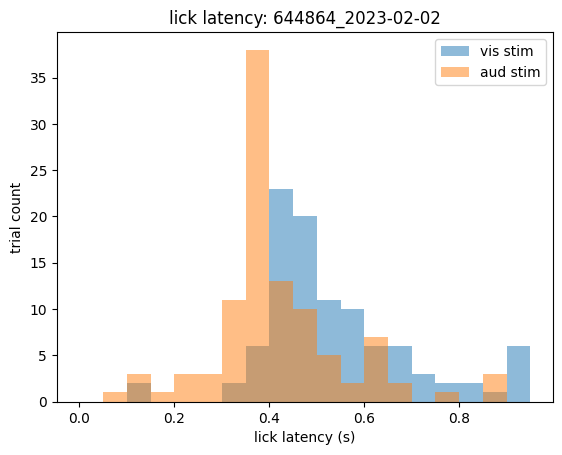

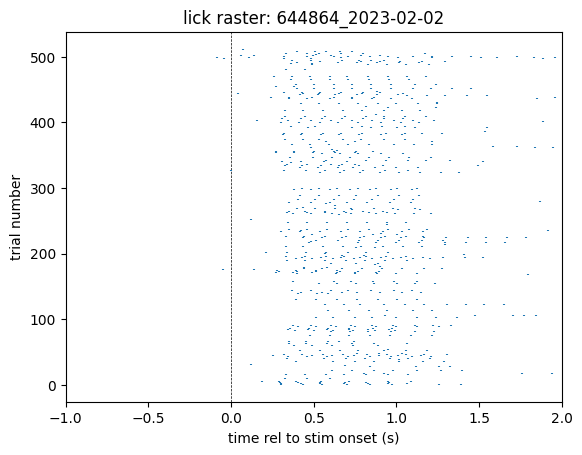

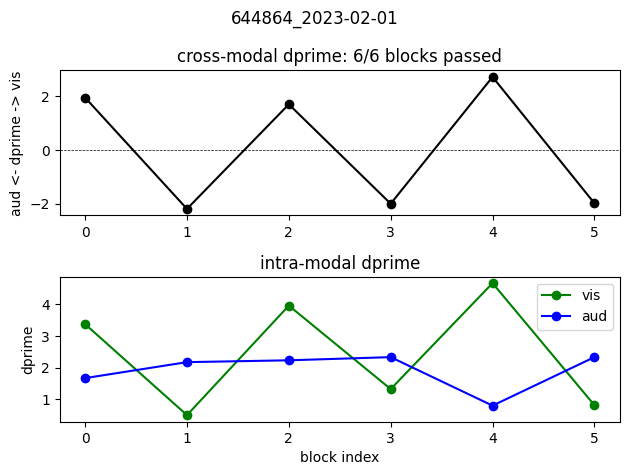

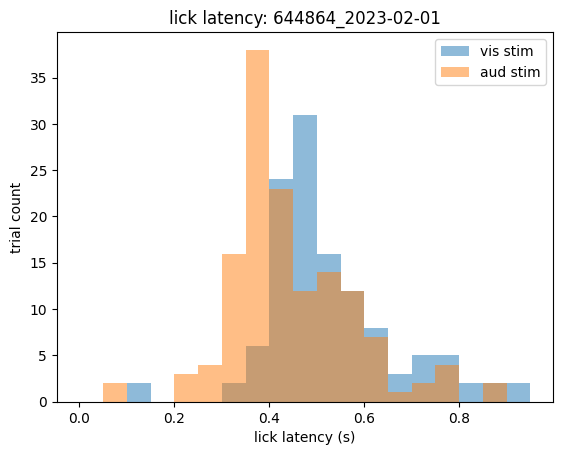

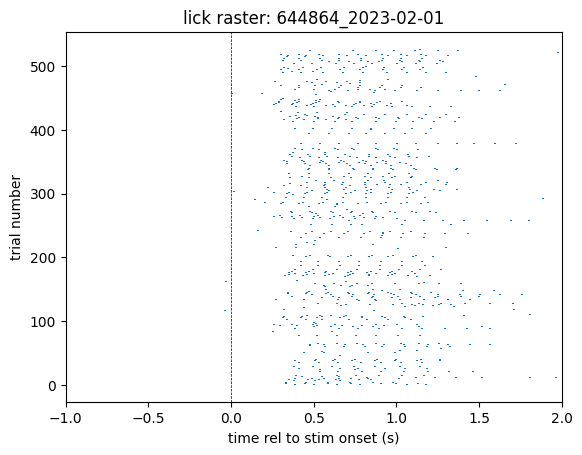

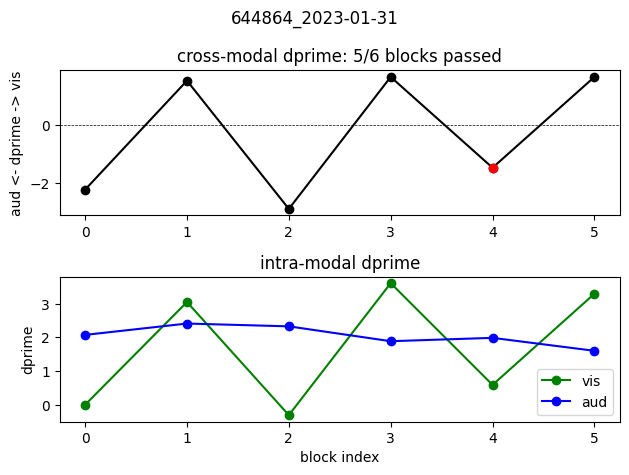

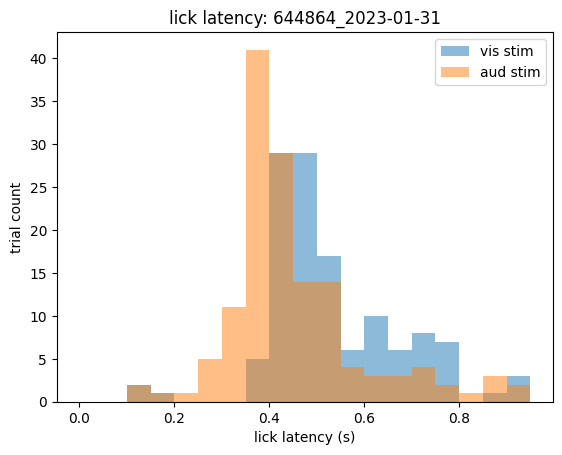

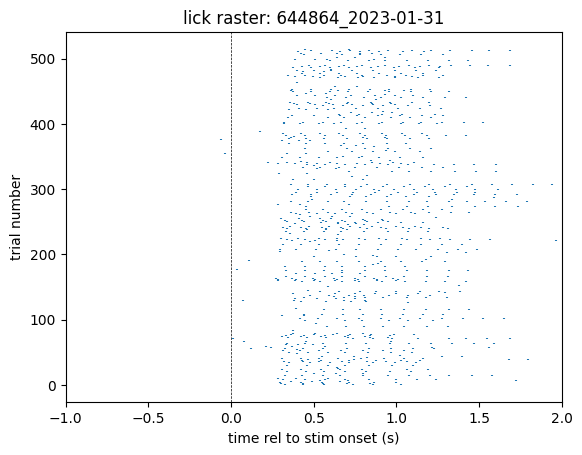

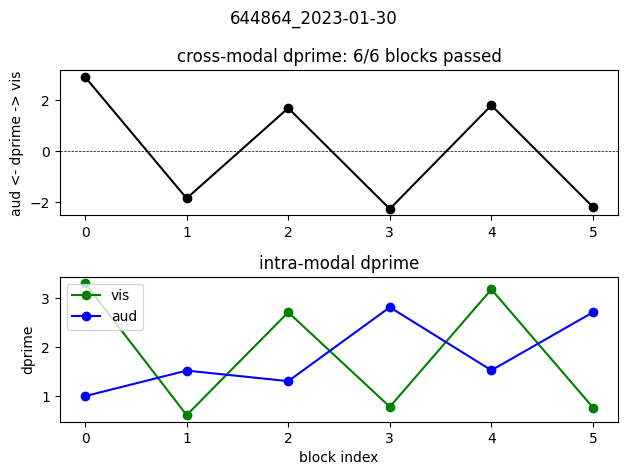

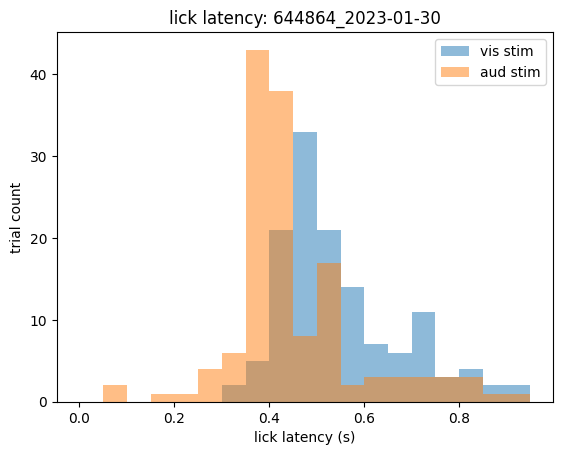

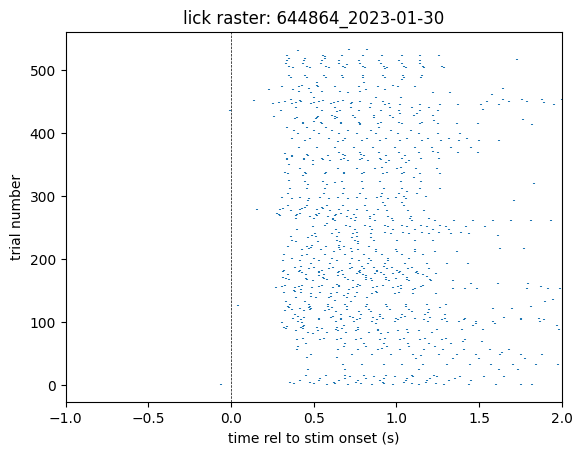

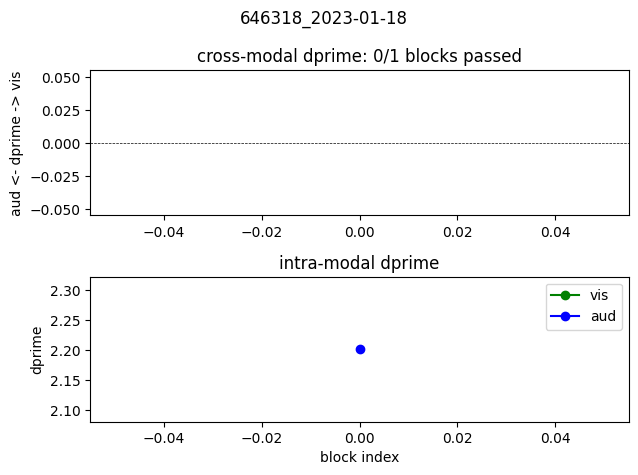

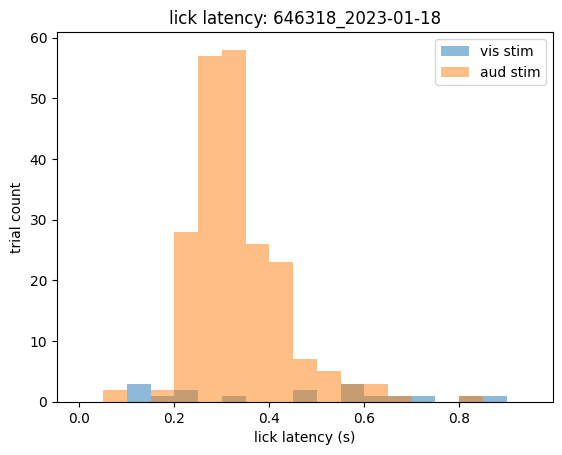

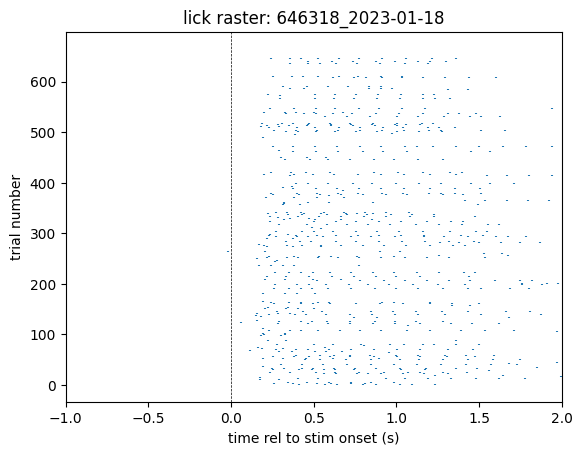

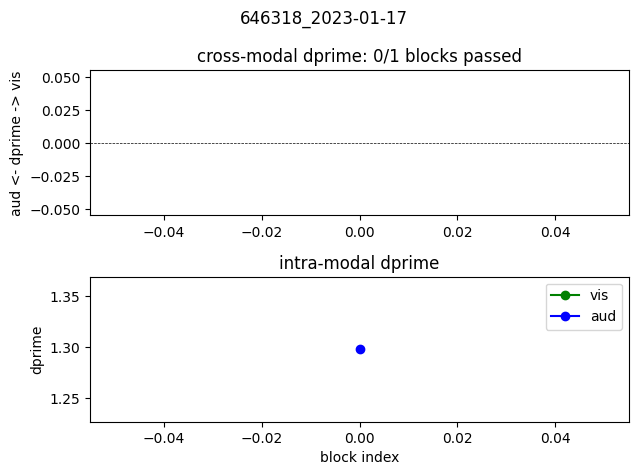

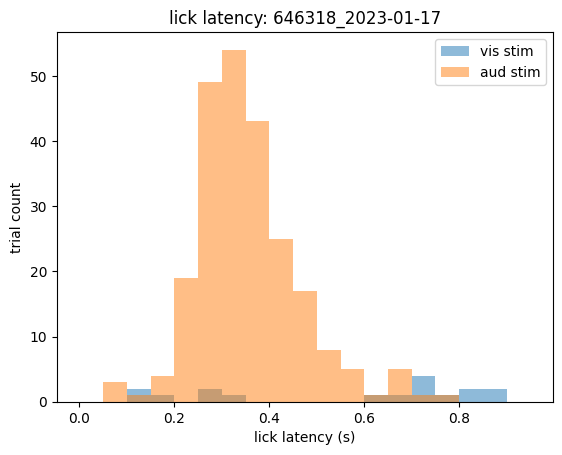

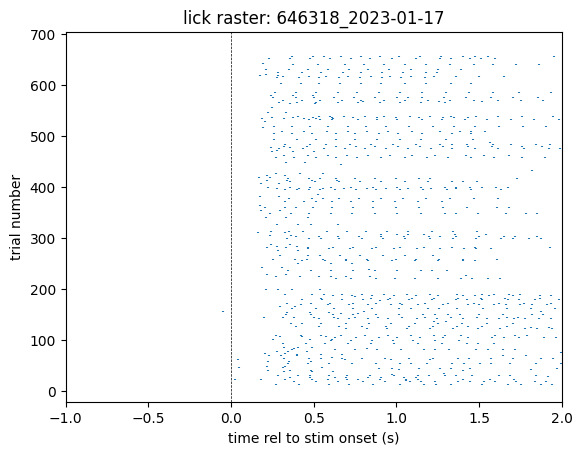

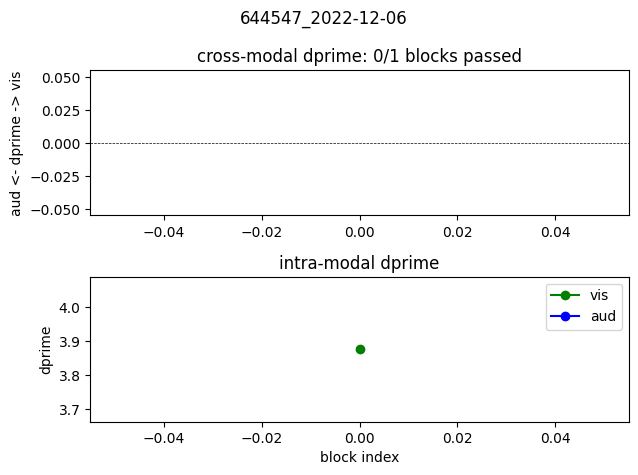

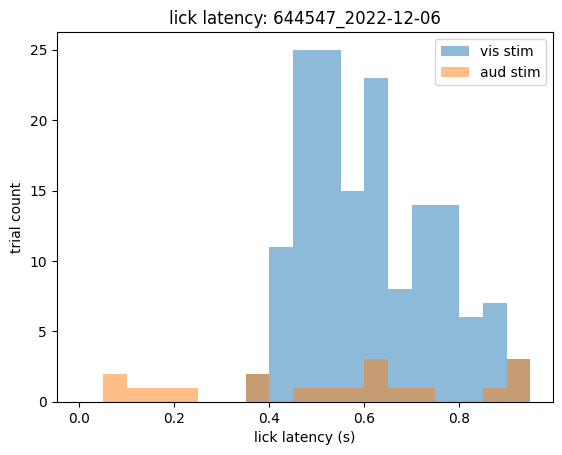

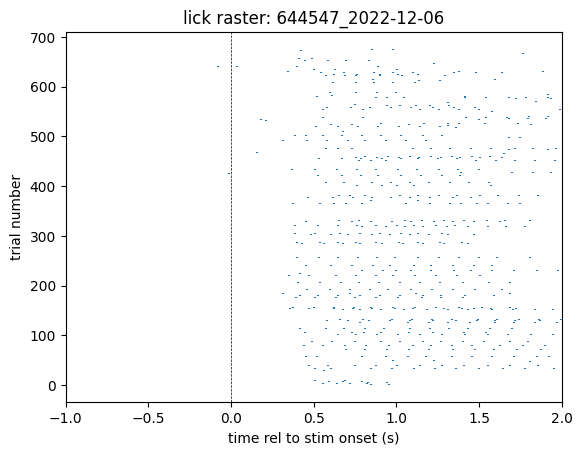

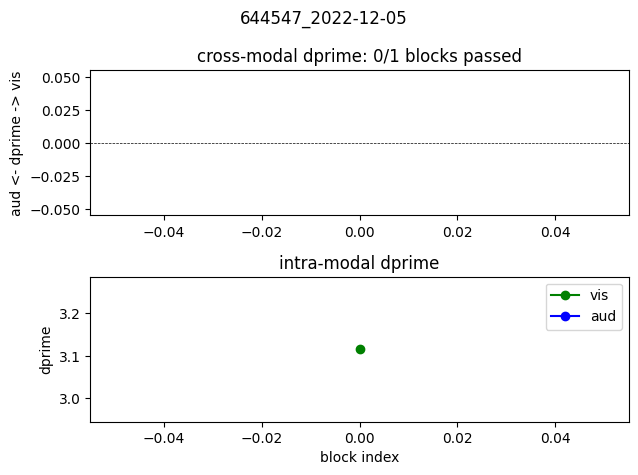

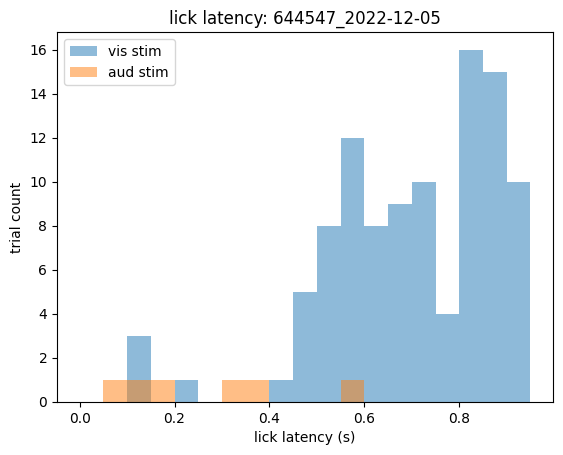

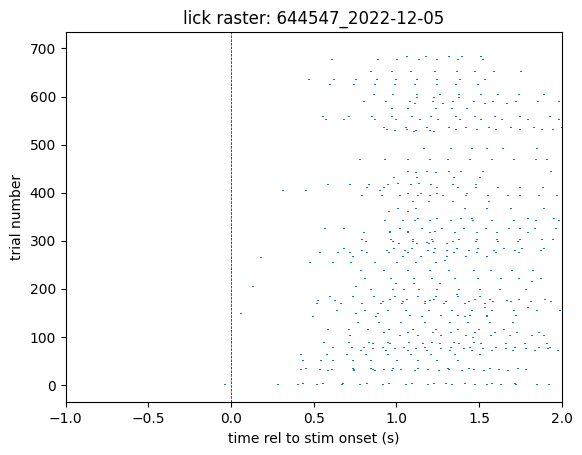

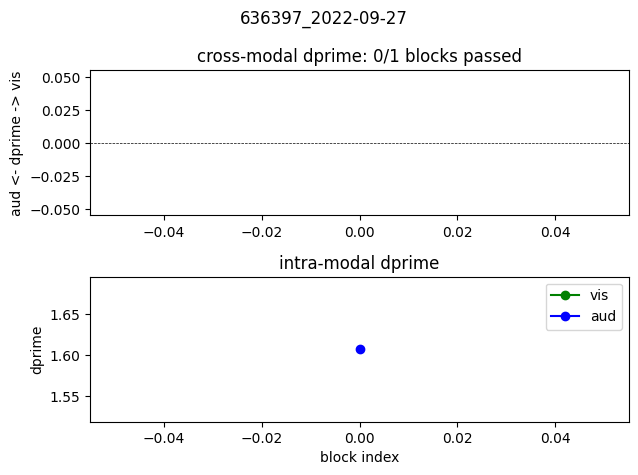

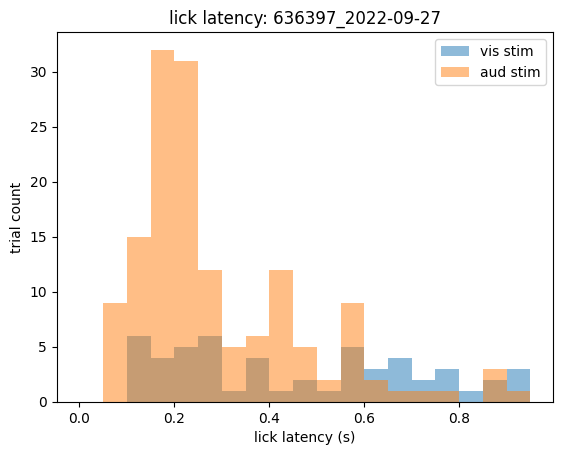

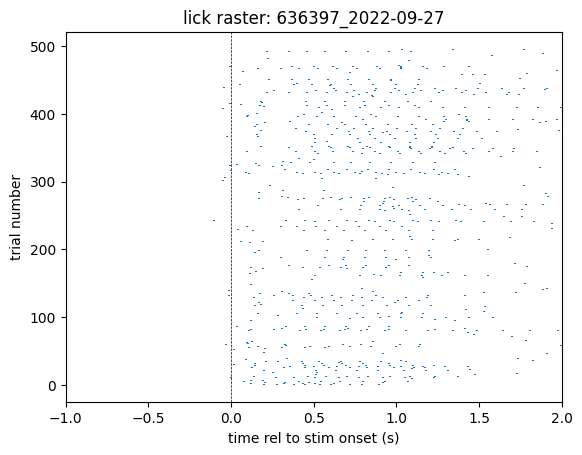

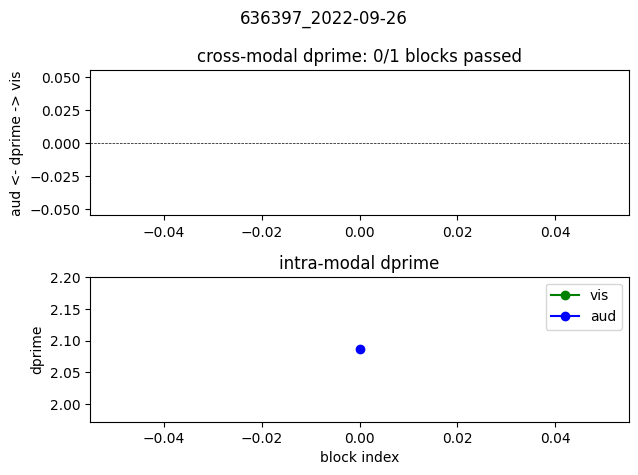

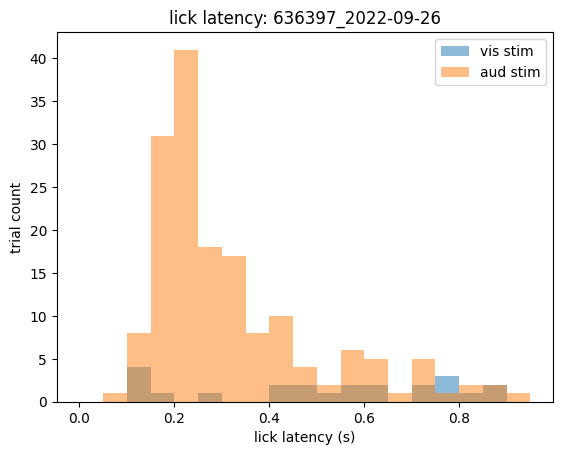

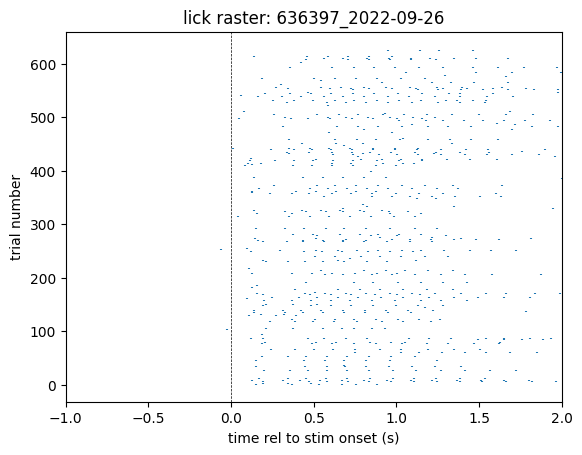

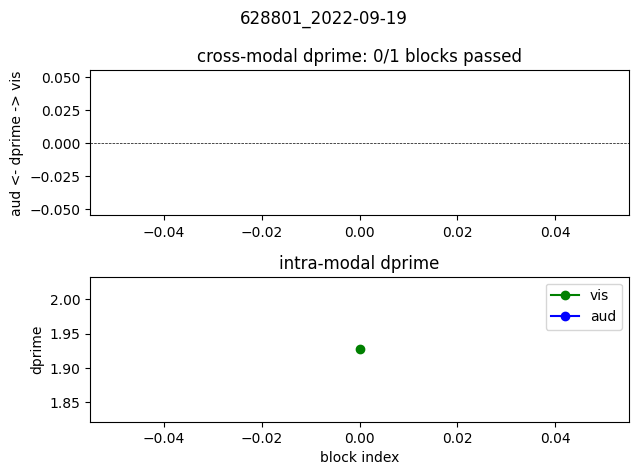

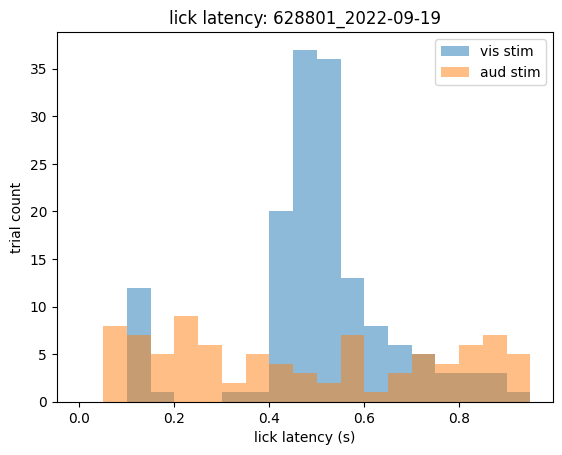

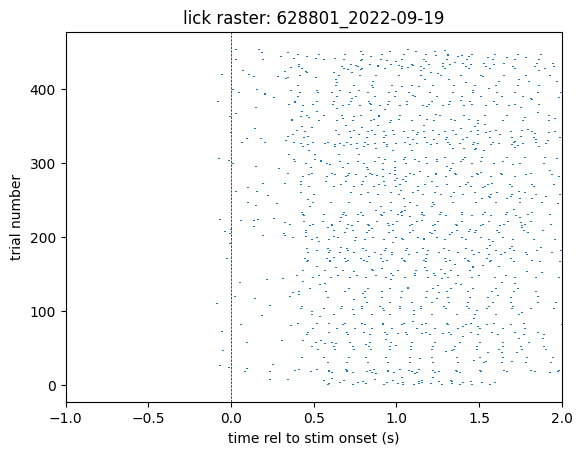

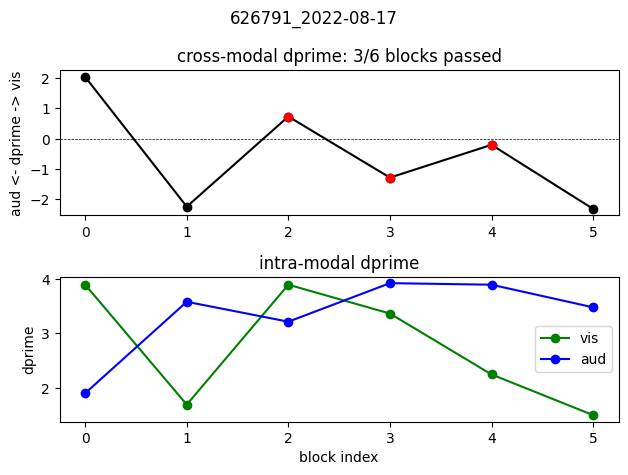

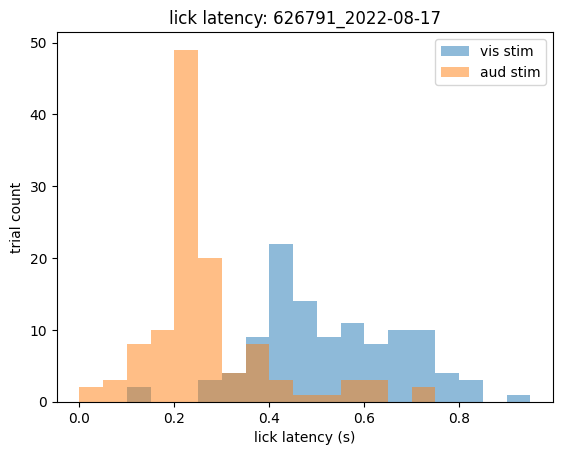

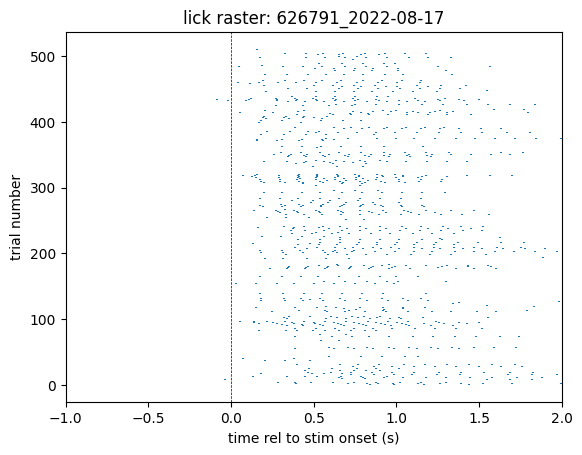

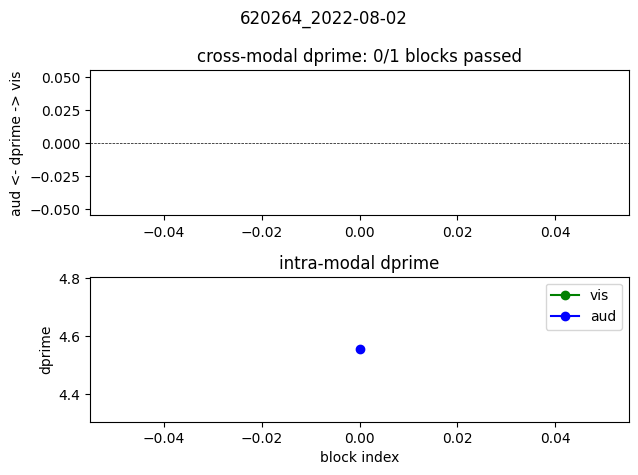

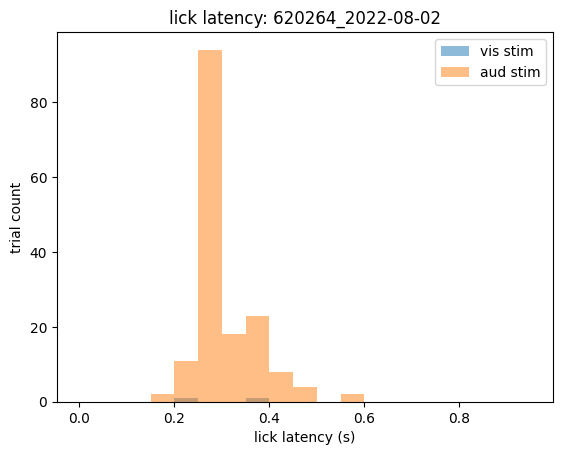

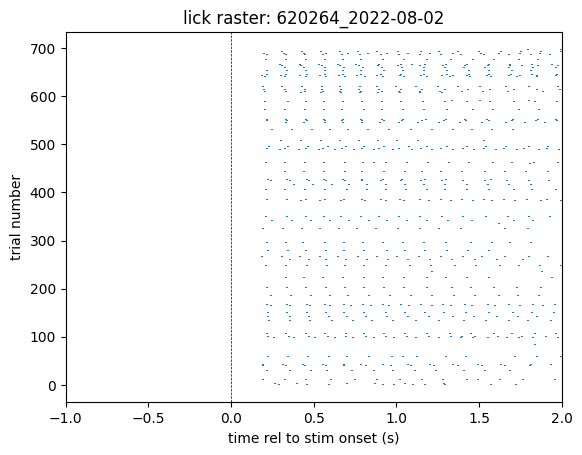

In [20]:
for session in get_sessions():
    try:
        
        task_performance_by_block_df = get_performance_by_block(session)
        fig=plot_performance_by_block(session, task_performance_by_block_df)

        savepath=os.path.join(r"C:\Users\ethan.mcbride\OneDrive - Allen Institute\DR_QC_stuff\task_behavior",session.id+"_task_performance_by_block.png")
        fig.savefig(savepath, dpi=300, format=None, metadata=None,
                    bbox_inches=None, pad_inches=0.1,
                    facecolor='auto', edgecolor='auto',
                    backend=None,
                )
        
        fig=plot_first_lick_latency_hist(session)

        savepath=os.path.join(r"C:\Users\ethan.mcbride\OneDrive - Allen Institute\DR_QC_stuff\task_behavior",session.id+"_first_lick_latency.png")
        fig.savefig(savepath, dpi=300, format=None, metadata=None,
                    bbox_inches=None, pad_inches=0.1,
                    facecolor='auto', edgecolor='auto',
                    backend=None,
                )

        fig=plot_lick_raster(session)

        savepath=os.path.join(r"C:\Users\ethan.mcbride\OneDrive - Allen Institute\DR_QC_stuff\task_behavior",session.id+"_lick_raster.png")
        fig.savefig(savepath, dpi=300, format=None, metadata=None,
                    bbox_inches=None, pad_inches=0.1,
                    facecolor='auto', edgecolor='auto',
                    backend=None,
                )

    except:
        continue

In [13]:
task_performance_by_block_df

context  cross_modal_dprime  signed_cross_modal_dprime  vis_intra_dprime  \
0     vis            1.604826                   1.604826          4.652696   
1     aud            1.948956                  -1.948956          1.000318   
2     vis            2.757075                   2.757075          4.652696   
3     aud            1.690622                  -1.690622          0.721522   
4     vis            1.478317                   1.478317          3.013216   
5     aud            2.850748                  -2.850748          1.801947   

   aud_intra_dprime  
0          1.526119  
1          2.867743  
2          1.895621  
3          2.877453  
4          1.256495  
5          2.805854

In [6]:
session.sam.dprimeSameModal

[3.829011650111114,
 2.3753097209450025,
 3.897895495392883,
 3.0763413930892485,
 3.21948307639743,
 2.4394696378710043]

In [8]:
session.sam.dprimeOtherModalGo

[1.1929835410732137,
 1.4565226919873606,
 2.3906912838355114,
 1.88950996033343,
 1.68458440771703,
 2.484364497248095]

In [9]:
session.sam.dprimeNonrewardedModal

[1.5261186643426434,
 1.0003176670386418,
 1.5292366852445969,
 0.7215222839823433,
 1.2564950707983333,
 1.4135309981447879]

In [14]:
session.sam.blockStimRewarded

array(['vis1', 'sound1', 'vis1', 'sound1', 'vis1', 'sound1'], dtype=object)